In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading in the data set
data = pd.read_excel('Customer Churn Data.xlsx')
data.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [3]:
# size of the data
data.shape

(11260, 19)

In [4]:
# details of the features in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
data.nunique()

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                    5693
Login_device                   3
dtype: int64

In [6]:
# checking for blank strings within each object feature in our dataset
for col in data.columns:
    if data[col].dtype == 'O':
        num_blanks = (data[col].str.strip() == '').sum()
        if num_blanks > 0:
            print(f' Column {col} has {num_blanks} blank string(s)')
        else:
            print('No blank strings')

No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings
No blank strings


In [7]:
# defining the features having numeric values but are of the dtype 'Object'
object_col = ['Tenure','Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']
for col in object_col:
  print(col)
  print(data[col].unique()) # checking for unique values in each given feature
  print('-'*80)

Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
--------------------------------------------------------------------------------
Account_user_count
[3 4 nan 5 2 '@' 1 6]
--------------------------------------------------------------------------------
rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]
--------------------------------------------------------------------------------
rev_growth_yoy
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]
--------------------------------------------------------------------------------
coupon_used_for_payment
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]
--------------------------------------------------------------------------------
Day_Since_CC_connect
[5 0 3 7 2 1 8 6 4 15 nan 11 1

In [8]:
# as we can see above, all these columns have random string values containing special characters.
# we will replace these values with NaN for EDA
for col in object_col:
    data[col] = pd.to_numeric(data[col], errors='coerce') # replacing all the string values with NaN and converting feature dtype to float64

In [9]:
# checking the value counts for the categorical features
for feature in data.columns:
  if data[feature].nunique() < 9:
    value_counts = data[feature].value_counts()
    percentages = round(data[feature].value_counts(1)*100,2)
    value_cnt = pd.DataFrame({'Distribution':value_counts,'Percentage':percentages})
    print(value_cnt)
    print('-'*60)

       Distribution  Percentage
Churn                          
0              9364       83.16
1              1896       16.84
------------------------------------------------------------
           Distribution  Percentage
City_Tier                          
1.0                7263       65.15
3.0                3405       30.54
2.0                 480        4.31
------------------------------------------------------------
                  Distribution  Percentage
Payment                                   
Debit Card                4587       41.14
Credit Card               3511       31.49
E wallet                  1217       10.91
Cash on Delivery          1014        9.09
UPI                        822        7.37
------------------------------------------------------------
        Distribution  Percentage
Gender                          
Male            6328       56.74
Female          4178       37.46
M                376        3.37
F                270        2.42
----------

In [129]:
data.isna().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [10]:
# In the gender and the account_segment features we have similar classes with different names
# we will rename one of these classes to ensure uniformity
data['Gender'] = data['Gender'].str.replace('Male','M') # replacing the Male with M
data['Gender'] = data['Gender'].str.replace('Female','F') # replacing the Female with F
data['account_segment'] = data['account_segment'].str.replace('Regular +','Regular Plus') # replacing regular + class to regular plus
data['account_segment'] = data['account_segment'].str.replace('Super +','Super Plus') # replacing Super + class to super plus

In [11]:
# descriptive statistics for the data
round(data.describe().T,2)

count      mean      std      min       25%  \
AccountID                11260.0  25629.50  3250.63  20000.0  22814.75   
Churn                    11260.0      0.17     0.37      0.0      0.00   
Tenure                   11042.0     11.03    12.88      0.0      2.00   
City_Tier                11148.0      1.65     0.92      1.0      1.00   
CC_Contacted_LY          11158.0     17.87     8.85      4.0     11.00   
Service_Score            11162.0      2.90     0.73      0.0      2.00   
Account_user_count       10816.0      3.69     1.02      1.0      3.00   
CC_Agent_Score           11144.0      3.07     1.38      1.0      2.00   
rev_per_month            10469.0      6.36    11.91      1.0      3.00   
Complain_ly              10903.0      0.29     0.45      0.0      0.00   
rev_growth_yoy           11257.0     16.19     3.76      4.0     13.00   
coupon_used_for_payment  11257.0      1.79     1.97      0.0      1.00   
Day_Since_CC_connect     10902.0      4.63     3.70      0.0      2.00   
cashback                 10787.0    196.24   178.66      0.0    147.21   

                              50%       75%      max  
AccountID                25629.50  28444.25  31259.0  
Churn                        0.00      0.00      1.0  
Tenure                       9.00     16.00     99.0  
City_Tier                    1.00      3.00      3.0  
CC_Contacted_LY             16.00     23.00    132.0  
Service_Score                3.00      3.00      5.0  
Account_user_count           4.00      4.00      6.0  
CC_Agent_Score               3.00      4.00      5.0  
rev_per_month                5.00      7.00    140.0  
Complain_ly                  0.00      1.00      1.0  
rev_growth_yoy              15.00     19.00     28.0  
coupon_used_for_payment      1.00      2.00     16.0  
Day_Since_CC_connect         3.00      8.00     47.0  
cashback                   165.25    200.01   1997.0

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# defining the categorical and the continuous features for plotting
cat_feat = [feature for feature in data.columns if data[feature].nunique() < 9]
cont_feat = [feature for feature in data.columns if feature not in cat_feat]

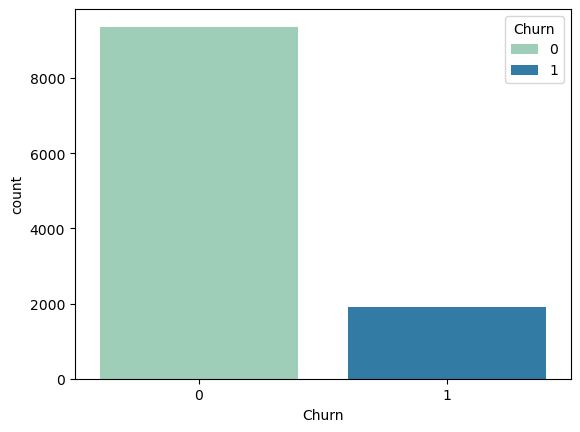

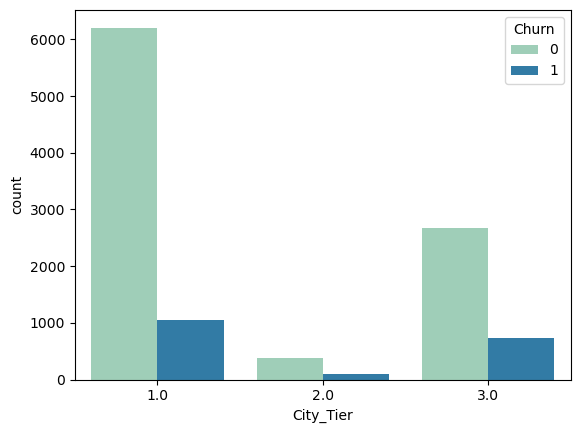

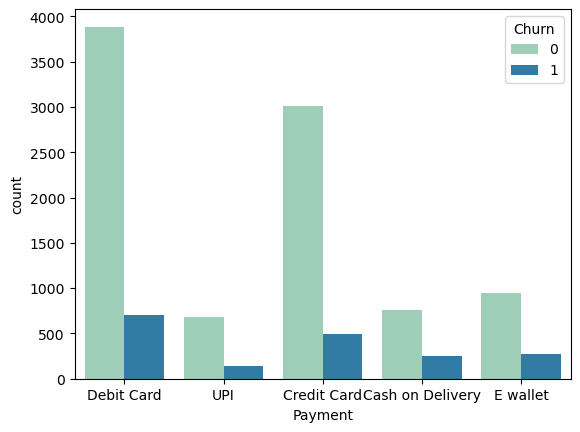

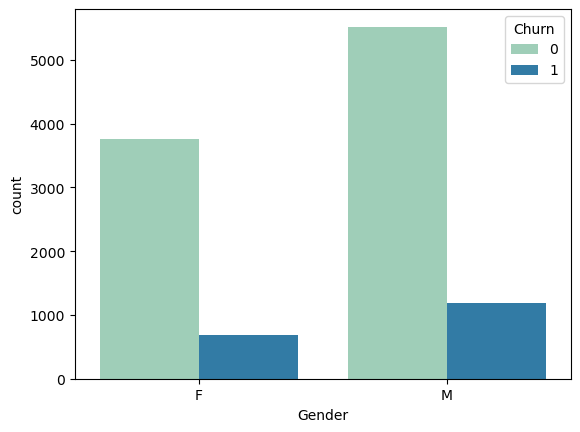

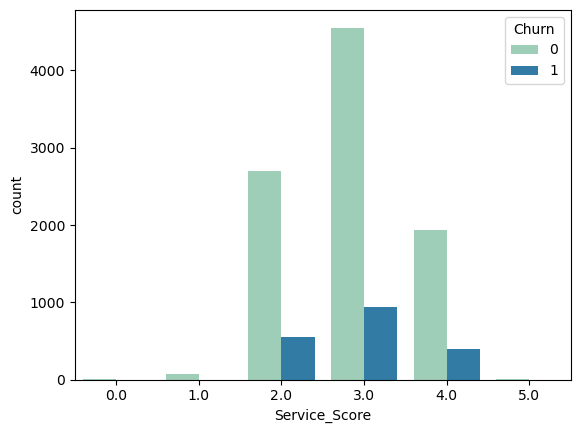

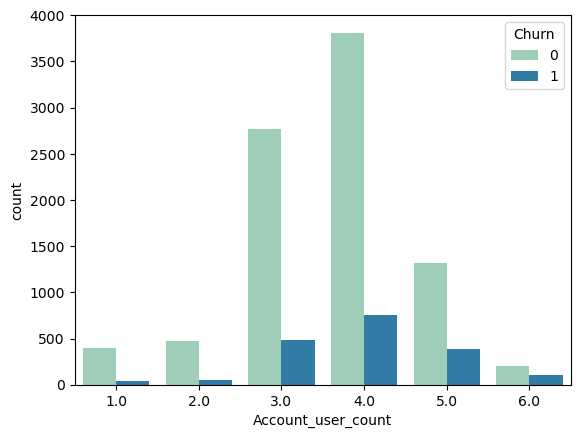

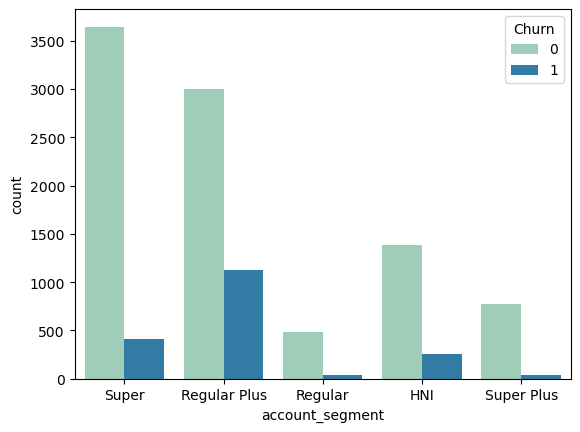

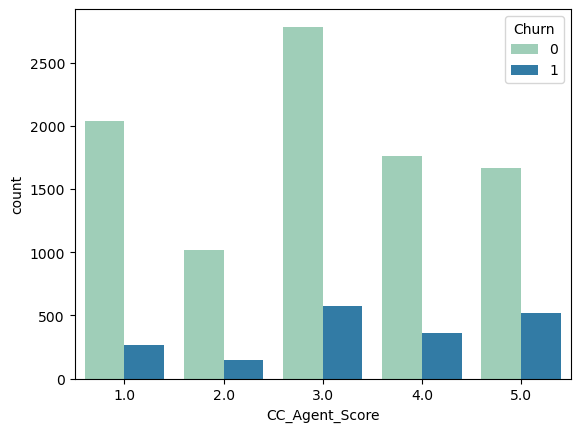

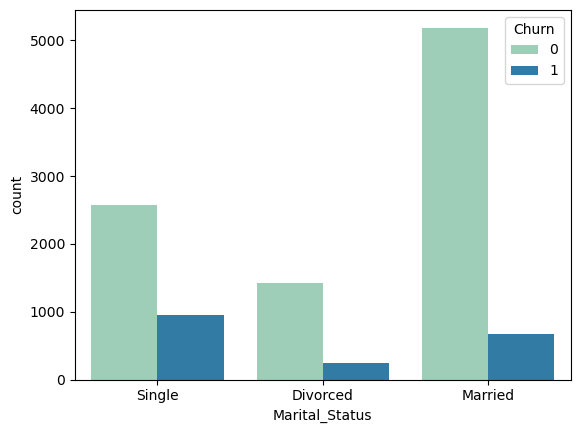

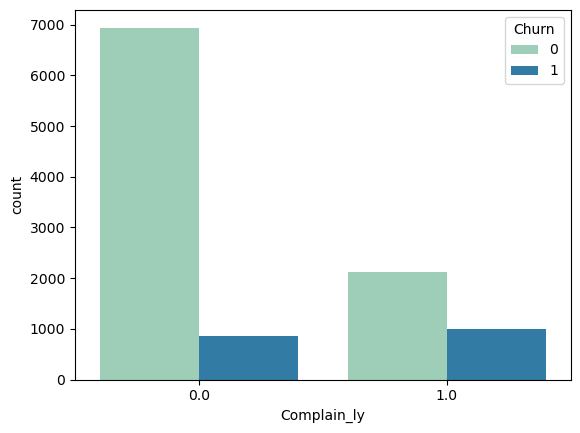

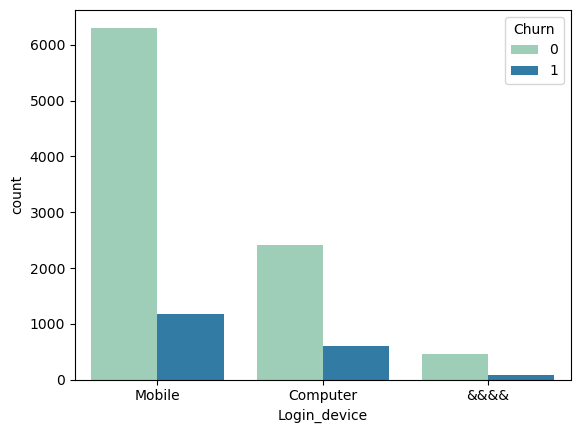

In [14]:
# categorical features vs the depenent feature
for col in cat_feat:
    sns.countplot(data, x=col, hue='Churn', palette='YlGnBu')
    plt.savefig(f'{col}vsChurnCountPlot.png', bbox_inches='tight')
    plt.show();

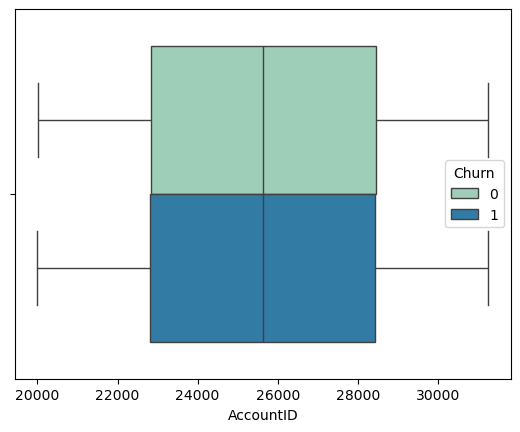

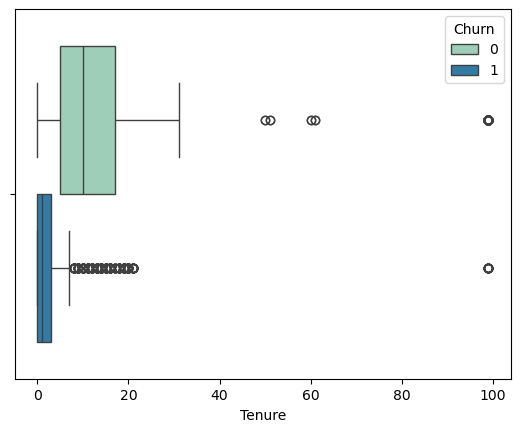

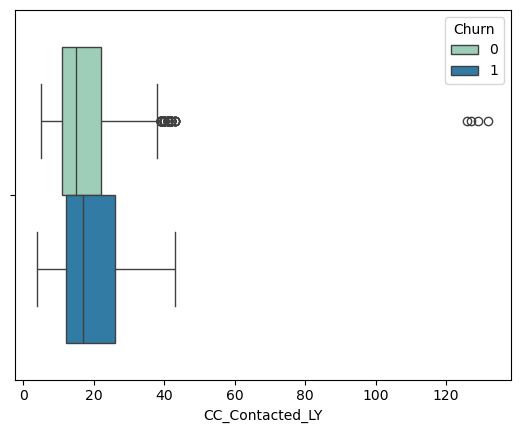

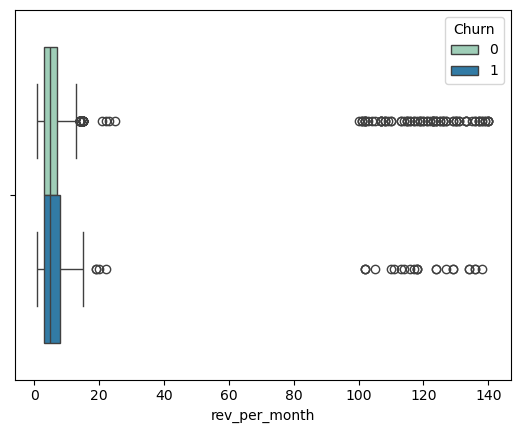

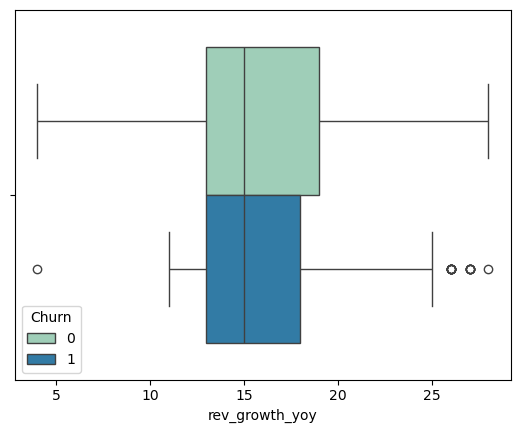

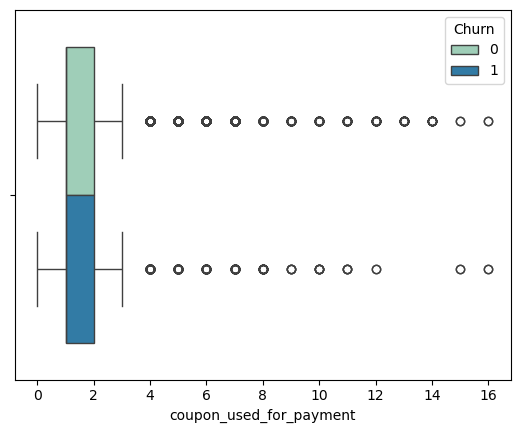

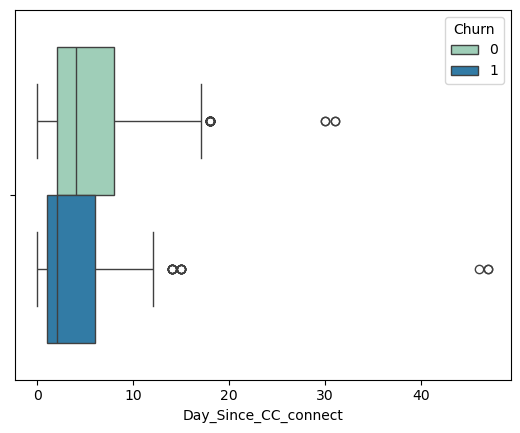

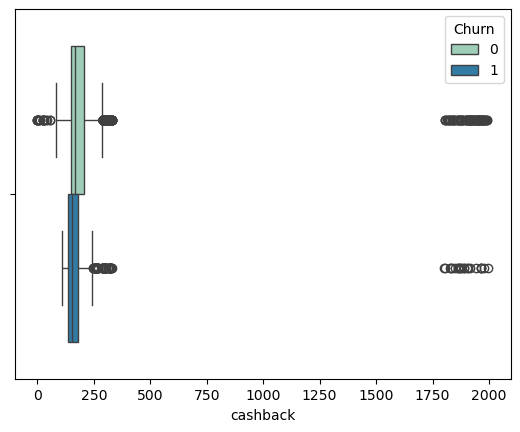

In [15]:
# continuous features vs the dependent feature
for col in cont_feat:
    sns.boxplot(data, x=col, hue='Churn', palette='YlGnBu')
    plt.savefig(f'{col}vsChurnBoxplot.png', bbox_inches='tight')
    plt.show();

In [16]:
# since there are no significant outliers in the data, there is no need for outlier treatment

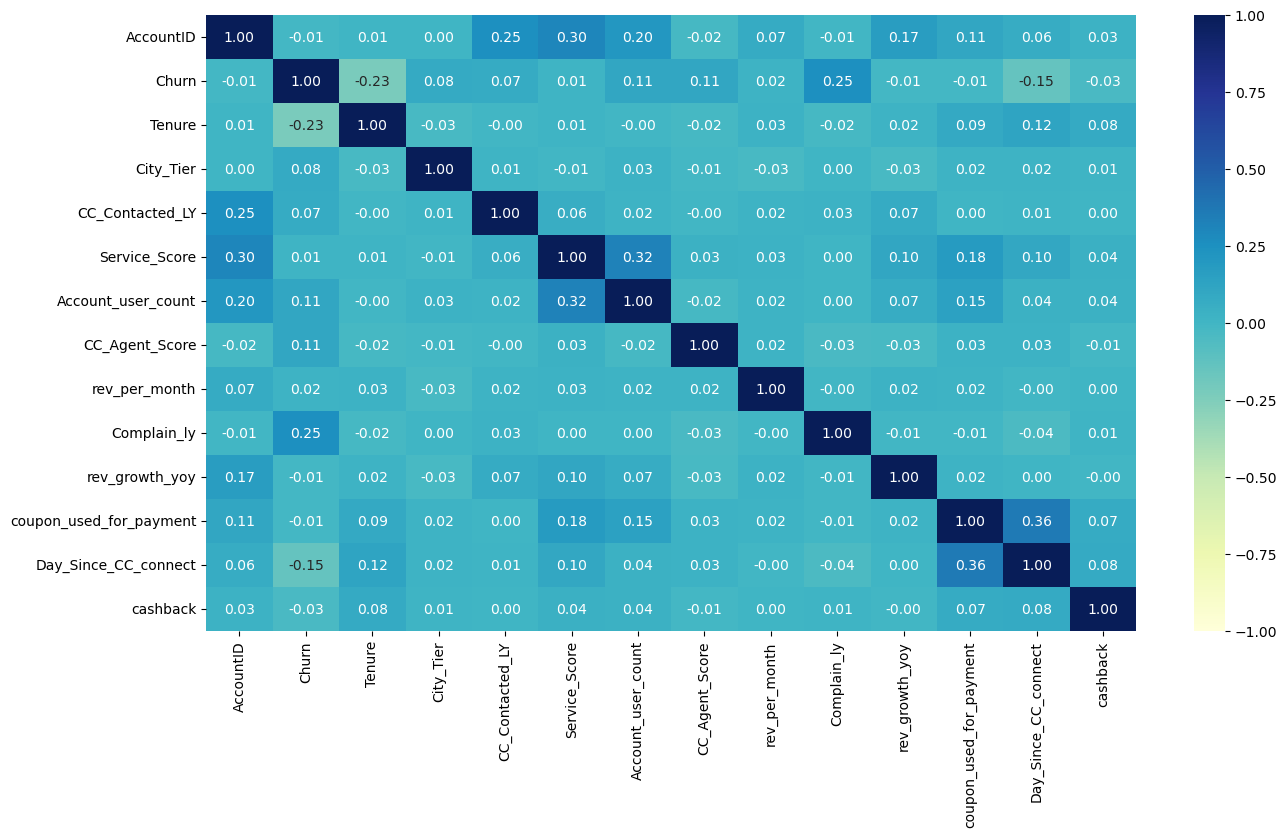

In [17]:
# heatmap
num_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
plt.figure(figsize=(15,8))
sns.heatmap(data[num_feature].corr(), vmin=-1, vmax=1, cmap = 'YlGnBu', annot=True, fmt = '.2f')
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show();

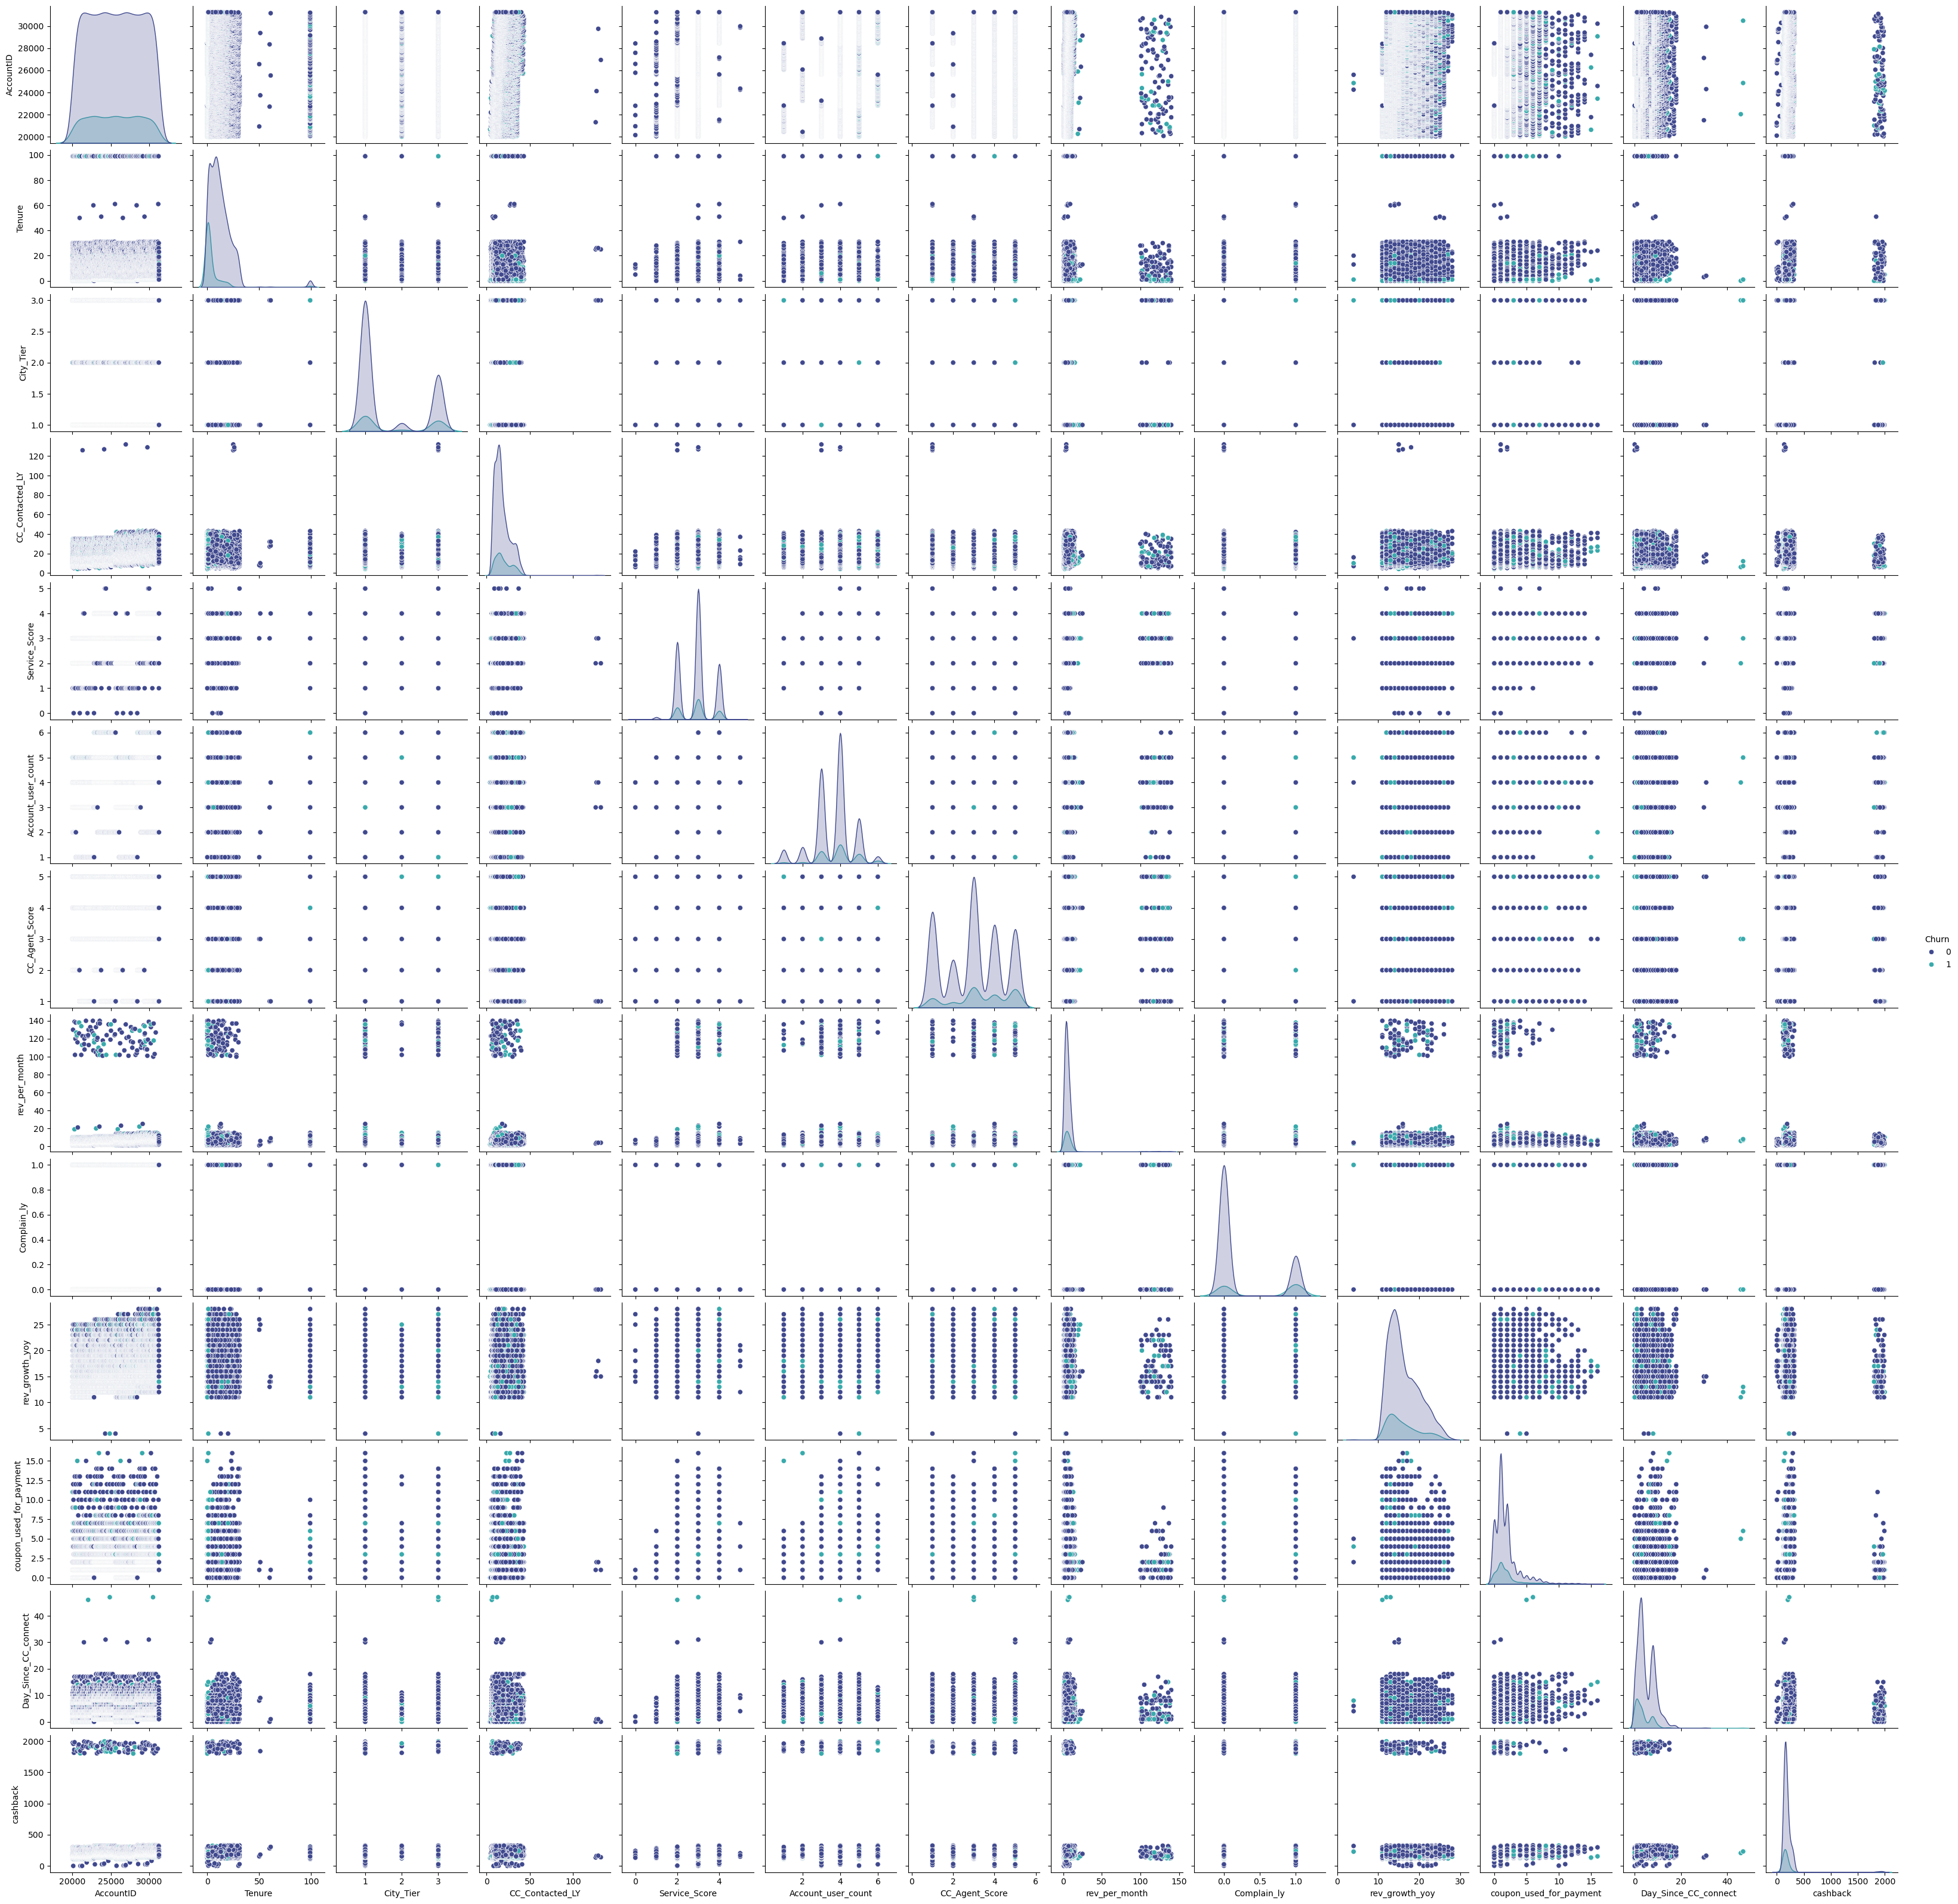

In [18]:
# pairplot
sns.pairplot(data, hue='Churn',palette='mako')
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show();

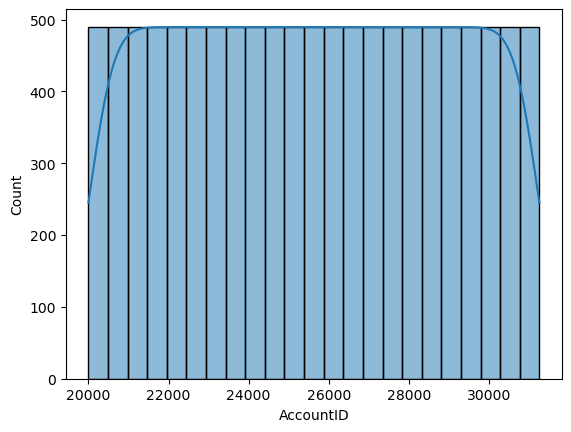

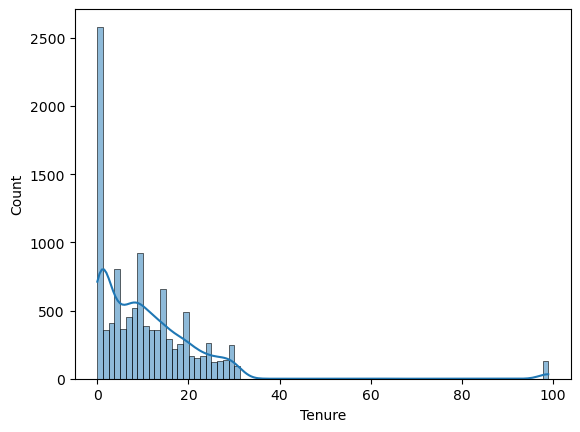

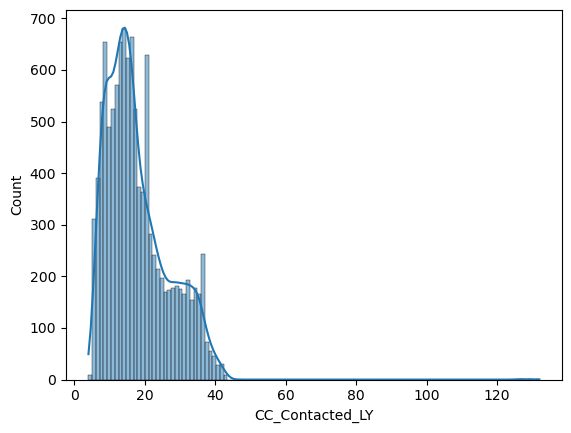

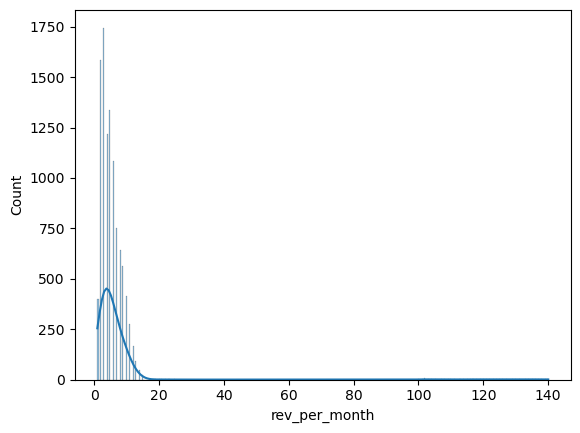

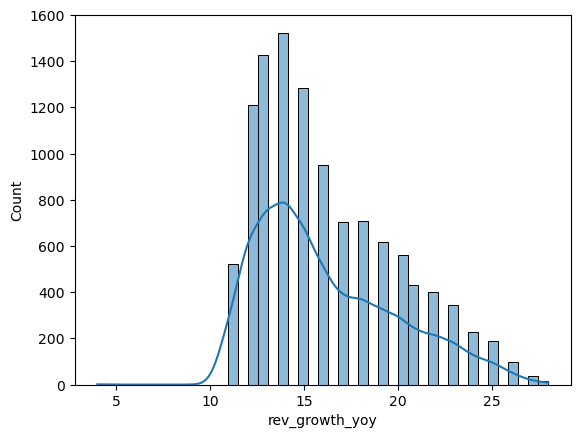

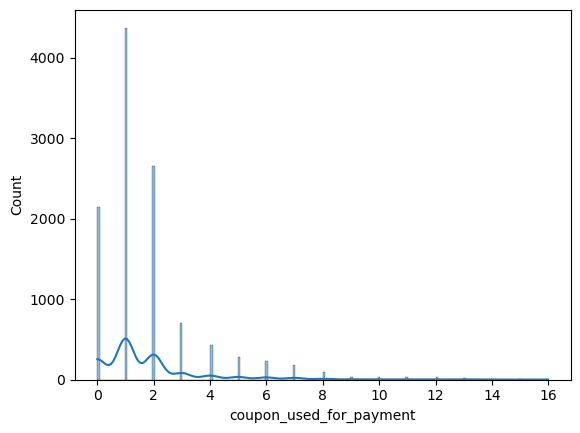

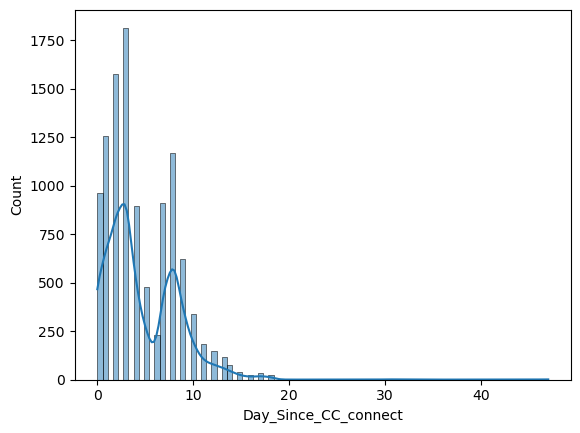

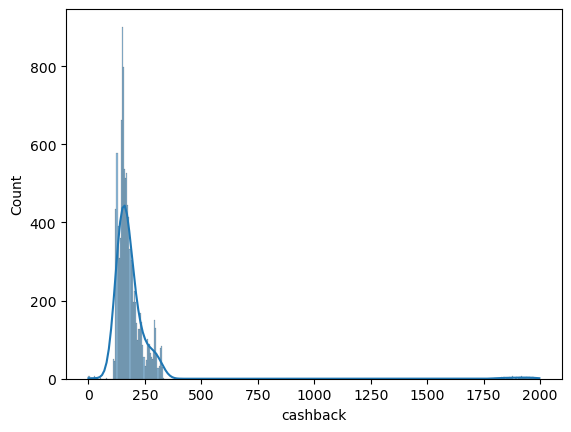

In [19]:
# checking the distribution of the continuous features
for col in cont_feat:
  sns.histplot(data=data, x=data[col], kde=True, palette='YlGnBu')
  plt.savefig(f'{col}histplots.png', bbox_inches='tight')
  plt.show();

In [20]:
data.head()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
0      20000      1     4.0        3.0              6.0   Debit Card      F   
1      20001      1     0.0        1.0              8.0          UPI      M   
2      20002      1     0.0        1.0             30.0   Debit Card      M   
3      20003      1     0.0        3.0             15.0   Debit Card      M   
4      20004      1     0.0        1.0             12.0  Credit Card      M   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0       NaN       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

In [21]:
# dropping the 'AccountID' feature
data.drop('AccountID', axis=1, inplace=True)

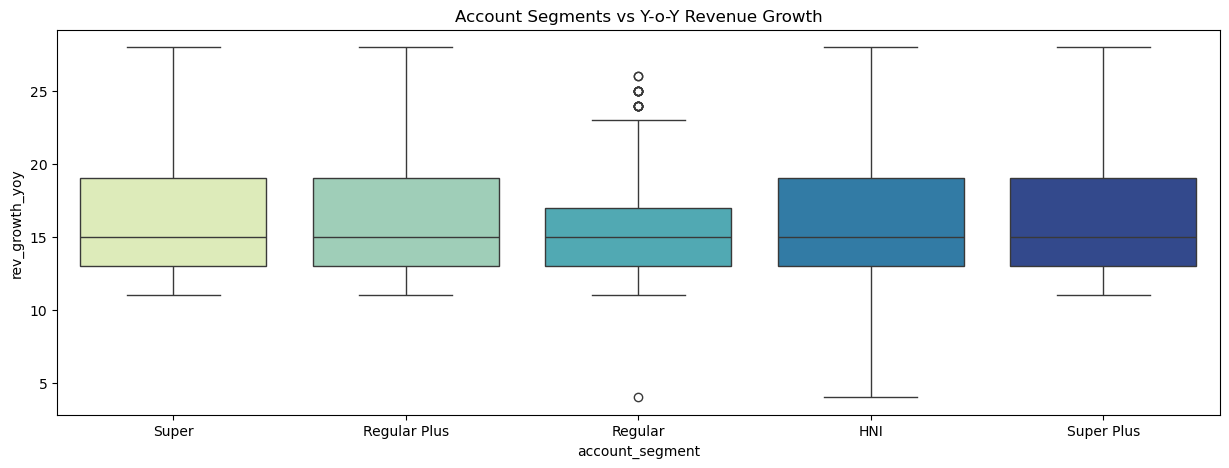

In [22]:
# analyzing relation between 'account_segment' and 'rev_growth_yoy'
plt.figure(figsize=(15,5))
sns.boxplot(x = 'account_segment',y='rev_growth_yoy',data = data, palette='YlGnBu')
plt.title('Account Segments vs Y-o-Y Revenue Growth')
plt.savefig('AccountSegments vs RevenueGrowth boxplot.png',bbox_inches='tight')
plt.show();

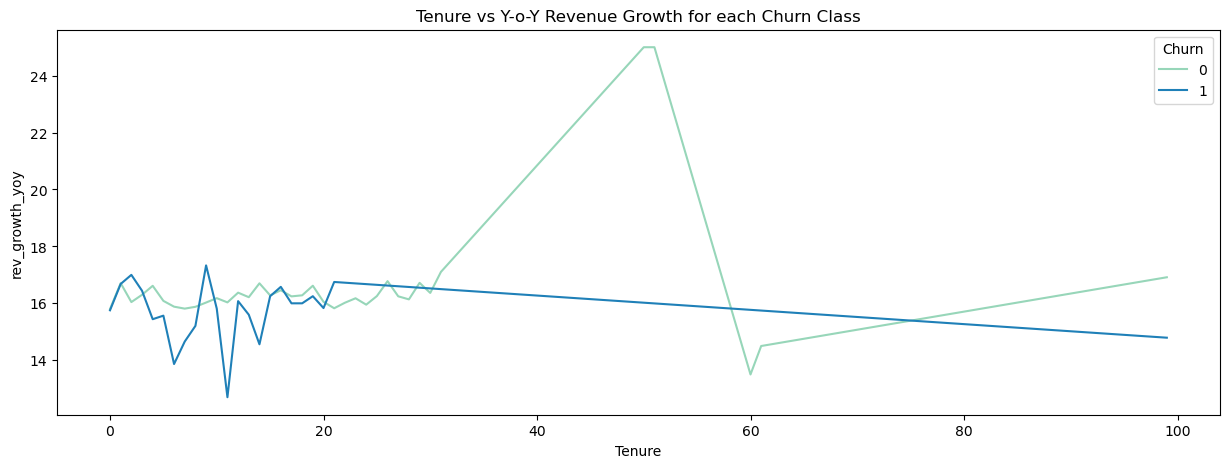

In [23]:
# analyzing the relation between 'Tenure' and 'Y-o-Y Revenue Growth'
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='Tenure',y='rev_growth_yoy',hue='Churn',palette='YlGnBu', ci=None)
plt.title('Tenure vs Y-o-Y Revenue Growth for each Churn Class')
plt.savefig('TenureVsRevenueGrowthLineplot.png', bbox_inches='tight')
plt.show();

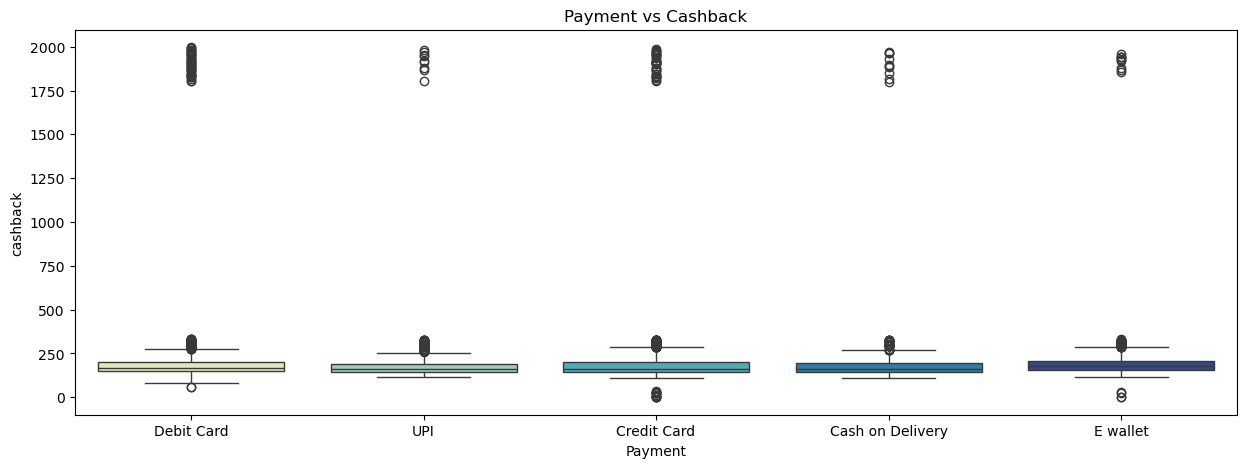

In [24]:
# analyzing relation between 'payment' and 'cashback_received'
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Payment',y='cashback',data = data, palette='YlGnBu')
plt.title('Payment vs Cashback')
plt.savefig('PaymentvsCashbackboxplot.png',bbox_inches='tight')
plt.show();

### Outlier Detection

In [25]:
# defining the outlier bounds for detection
num_feat = [feature for feature in data.columns if data[feature].dtype != 'O']
Q1 = data[num_feat].quantile(0.25) # to find the 25th percentile
Q3 = data[num_feat].quantile(0.75) # to find the 75th percentile

IQR = Q3 - Q1 # inter quartile range

# finding lower and upper bounds for all values. all values outside these bounds are outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_percent = [round(((data[num_feat] < lower_bound) | (data[num_feat] > upper_bound)).sum() / len(data) * 100,2)]
print(outlier_percent)

[Churn                      16.84
Tenure                      1.23
City_Tier                   0.00
CC_Contacted_LY             0.37
Service_Score               0.12
Account_user_count          6.76
CC_Agent_Score              0.00
rev_per_month               1.64
Complain_ly                 0.00
rev_growth_yoy              0.00
coupon_used_for_payment    12.26
Day_Since_CC_connect        0.29
cashback                    7.81
dtype: float64]


In [26]:
# defining the features for outlier treatment
outlier_treat = ['Account_user_count','coupon_used_for_payment','cashback']

# treating outliers for the above given features
for feat in outlier_treat:
    Q1 = data[feat].quantile(0.25)
    Q3 = data[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values outside the IQR bounds
    data[feat] = np.where(data[feat] < lower_bound, lower_bound,
                         np.where(data[feat] > upper_bound, upper_bound, data[feat]))

# Missing Value Imputation

In [27]:
from sklearn.impute import KNNImputer

# instantiating the imputer
imputer = KNNImputer(n_neighbors=5)

# defining a list of features to impute missing values
impute_feat = [feature for feature in data.columns if data[feature].isna().sum() > 0]
impute_feat

['Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback',
 'Login_device']

In [28]:
# checking for categorical features within the features having missing values
for feature in impute_feat:
    if data[feature].nunique() < 13:
        print(data[feature].value_counts())
        print('-' * 50)

City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64
--------------------------------------------------
Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64
--------------------------------------------------
Gender
M    6704
F    4448
Name: count, dtype: int64
--------------------------------------------------
Service_Score
3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: count, dtype: int64
--------------------------------------------------
Account_user_count
4.0    4569
3.0    3261
5.0    1699
2.0     526
1.5     446
5.5     315
Name: count, dtype: int64
--------------------------------------------------
account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64
--------------------------------------------------
CC_Agent_Score
3.0    3360
1.0    

In [29]:
# encoding the categorical features into numerical values for the imputation process
payment = {'Debit Card':0,'Credit Card':1,'E wallet':2,'Cash on Delivery':3,'UPI':4}
gender = {'M':0,'F':1}
account_segment = {'Regular Plus':0,'Super':1,'HNI':2,'Super Plus':3,'Regular':4}
marital_status = {'Married':0,'Single':1,'Divorced':2}
login_device ={'Mobile':0,'Computer':1,'&&&&':2}

# mapping the encoding to the data
data['Payment'] = data['Payment'].map(payment)
data['Gender'] = data['Gender'].map(gender)
data['account_segment'] = data['account_segment'].map(account_segment)
data['Marital_Status'] = data['Marital_Status'].map(marital_status)
data['Login_device'] = data['Login_device'].map(login_device)

In [30]:
data.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0      1     4.0        3.0              6.0      0.0     1.0            3.0   
1      1     0.0        1.0              8.0      4.0     0.0            3.0   
2      1     0.0        1.0             30.0      0.0     0.0            2.0   
3      1     0.0        3.0             15.0      0.0     0.0            2.0   
4      1     0.0        1.0             12.0      1.0     0.0            2.0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                 3.0              1.0             2.0             1.0   
1                 4.0              0.0             3.0             1.0   
2                 4.0              0.0             3.0             1.0   
3                 4.0              1.0             5.0             1.0   
4                 3.0              0.0             5.0             1.0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0          1.0            11.0                      1.0   
1            7.0          1.0            15.0                      0.0   
2            6.0          1.0            14.0                      0.0   
3            8.0          0.0            23.0                      0.0   
4            3.0          0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Login_device  
0                   5.0    159.93           0.0  
1                   0.0    120.90           0.0  
2                   3.0       NaN           0.0  
3                   3.0    134.07           0.0  
4                   3.0    129.60           0.0

In [31]:
from sklearn.model_selection import train_test_split

# splitting the data into training, validation, and testing data
x = data.drop('Churn',axis=1)
y = data['Churn']

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.4,random_state=1, stratify=y)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5, random_state=1, stratify=y_val)

In [32]:
print(f'The size of the training data is {x_train.shape}')
print(f'The size of the validation data is {x_val.shape}')
print(f'The size of the testing data is {x_test.shape}')

The size of the training data is (6756, 17)
The size of the validation data is (2252, 17)
The size of the testing data is (2252, 17)


In [33]:
# we will impute the missing values on the data split using the KNN Imputer
# fit and transform the training data
x_train[impute_feat] = imputer.fit_transform(x_train)

# validation data
x_val[impute_feat] = imputer.transform(x_val)

# testing data
x_test[impute_feat] = imputer.transform(x_test)

In [34]:
# now we will inverse map the encoding of the categorical variables that we have performed earlier
def inverse_mapping(x,y):
    inv_dict = {v:k for k,v in x.items()}
    x_train[y] = np.round(x_train[y]).map(inv_dict).astype('category')
    x_val[y] = np.round(x_val[y]).map(inv_dict).astype('category')
    x_test[y] = np.round(x_test[y]).map(inv_dict).astype('category')

In [35]:
inverse_mapping(payment, 'Payment')
inverse_mapping(gender, 'Gender')
inverse_mapping(account_segment, 'account_segment')
inverse_mapping(marital_status, 'Marital_Status')
inverse_mapping(login_device, 'Login_device')

In [36]:
for col in impute_feat:
    print(x_train[col].value_counts())
    print('-' * 50)

Tenure
1.0     807
0.0     755
8.0     311
9.0     293
7.0     276
       ... 
23.6      1
2.8       1
34.2      1
51.0      1
2.6       1
Name: count, Length: 90, dtype: int64
--------------------------------------------------
City_Tier
1.0    4360
3.0    2049
2.0     290
1.4      18
1.8      15
2.2      10
2.6       6
1.6       3
1.2       2
2.4       2
2.8       1
Name: count, dtype: int64
--------------------------------------------------
CC_Contacted_LY
16.0    424
14.0    405
9.0     394
13.0    391
15.0    375
       ... 
22.4      1
27.4      1
9.6       1
15.8      1
19.4      1
Name: count, Length: 77, dtype: int64
--------------------------------------------------
Payment
Debit Card          2779
Credit Card         2099
E wallet             767
Cash on Delivery     624
UPI                  487
Name: count, dtype: int64
--------------------------------------------------
Gender
M    4057
F    2699
Name: count, dtype: int64
--------------------------------------------------
Se

In [37]:
# rounding of the values for the categorical variables after KNN imputation
# training data
x_train['City_Tier'] = np.round(x_train['City_Tier'])
x_train['Service_Score'] = np.round(x_train['Service_Score'])
x_train['Account_user_count'] = np.round(x_train['Account_user_count'])
x_train['CC_Agent_Score'] = np.round(x_train['CC_Agent_Score'])
x_train['Complain_ly'] = np.round(x_train['Complain_ly'])
x_train['coupon_used_for_payment'] = np.round(x_train['coupon_used_for_payment'])

# validation data
x_val['City_Tier'] = np.round(x_val['City_Tier'])
x_val['Service_Score'] = np.round(x_val['Service_Score'])
x_val['Account_user_count'] = np.round(x_val['Account_user_count'])
x_val['CC_Agent_Score'] = np.round(x_val['CC_Agent_Score'])
x_val['Complain_ly'] = np.round(x_val['Complain_ly'])
x_val['coupon_used_for_payment'] = np.round(x_val['coupon_used_for_payment'])

# testing data
x_test['City_Tier'] = np.round(x_test['City_Tier'])
x_test['Service_Score'] = np.round(x_test['Service_Score'])
x_test['Account_user_count'] = np.round(x_test['Account_user_count'])
x_test['CC_Agent_Score'] = np.round(x_test['CC_Agent_Score'])
x_test['Complain_ly'] = np.round(x_test['Complain_ly'])
x_test['coupon_used_for_payment'] = np.round(x_test['coupon_used_for_payment'])

# Feature Engineering

### Marital Status and Gender

In [38]:
x_train['Marital_Status'].value_counts()

Marital_Status
Married     3606
Single      2193
Divorced     957
Name: count, dtype: int64

In [39]:
x_train['Gender'].value_counts()

Gender
M    4057
F    2699
Name: count, dtype: int64

In [40]:
# creating a feature for married males from the Gender and the Marital Status features
def Married_M(data):
    if data['Marital_Status'] == 'Married' and data['Gender'] == 'M':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Married_M'] = x_train.apply(lambda x_train: Married_M(x_train), axis=1)
x_val['Married_M'] = x_val.apply(lambda x_val: Married_M(x_val), axis=1)
x_test['Married_M'] = x_test.apply(lambda x_test: Married_M(x_test), axis=1)

In [41]:
# feature for single male from Gender and Marital Status features
def Single_M(data):
    if data['Marital_Status'] == 'Single' and data['Gender'] == 'M':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Single_M'] = x_train.apply(lambda x_train: Single_M(x_train), axis=1)
x_val['Single_M'] = x_val.apply(lambda x_val: Single_M(x_val), axis=1)
x_test['Single_M'] = x_test.apply(lambda x_test: Single_M(x_test), axis=1)

In [42]:
# feature for divorced males
def Divorced_M(data):
    if data['Marital_Status'] == 'Divorced' and data['Gender'] == 'M':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Divorced_M'] = x_train.apply(lambda x_train: Divorced_M(x_train), axis=1)
x_val['Divorced_M'] = x_val.apply(lambda x_val: Divorced_M(x_val), axis=1)
x_test['Divorced_M'] = x_test.apply(lambda x_test: Divorced_M(x_test), axis=1)

### City Tier and Payment

In [43]:
x_train['City_Tier'].value_counts()

City_Tier
1.0    4380
3.0    2056
2.0     320
Name: count, dtype: int64

In [44]:
x_train['Payment'].value_counts()

Payment
Debit Card          2779
Credit Card         2099
E wallet             767
Cash on Delivery     624
UPI                  487
Name: count, dtype: int64

In [45]:
# creating a feature for Debit Card payments per city tier
def DebitCard_Tier1(data):
    if data['City_Tier'] == 1 and data['Payment'] == 'Debit Card':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Tier1_DebitCard'] = x_train.apply(lambda x_train:DebitCard_Tier1(x_train), axis=1)
x_val['Tier1_DebitCard'] = x_val.apply(lambda x_val:DebitCard_Tier1(x_val), axis=1)
x_test['Tier1_DebitCard'] = x_test.apply(lambda x_test:DebitCard_Tier1(x_test), axis=1)

In [46]:
# creating a feature for Debit Card payments per city tier
def DebitCard_Tier2(data):
    if data['City_Tier'] == 2 and data['Payment'] == 'Debit Card':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Tier2_DebitCard'] = x_train.apply(lambda x_train:DebitCard_Tier2(x_train), axis=1)
x_val['Tier2_DebitCard'] = x_val.apply(lambda x_val:DebitCard_Tier2(x_val), axis=1)
x_test['Tier2_DebitCard'] = x_test.apply(lambda x_test:DebitCard_Tier2(x_test), axis=1)

In [47]:
# creating a feature for Debit Card payments per city tier
def DebitCard_Tier3(data):
    if data['City_Tier'] == 3 and data['Payment'] == 'Debit Card':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Tier3_DebitCard'] = x_train.apply(lambda x_train:DebitCard_Tier3(x_train), axis=1)
x_val['Tier3_DebitCard'] = x_val.apply(lambda x_val:DebitCard_Tier3(x_val), axis=1)
x_test['Tier3_DebitCard'] = x_test.apply(lambda x_test:DebitCard_Tier3(x_test), axis=1)

In [48]:
# creating a feature for Credit Card payments per city tier
def CreditCard_Tier1(data):
    if data['City_Tier'] == 1 and data['Payment'] == 'Credit Card':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Tier1_CreditCard'] = x_train.apply(lambda x_train:CreditCard_Tier1(x_train), axis=1)
x_val['Tier1_CreditCard'] = x_val.apply(lambda x_val:CreditCard_Tier1(x_val), axis=1)
x_test['Tier1_CreditCard'] = x_test.apply(lambda x_test:CreditCard_Tier1(x_test), axis=1)

In [49]:
# creating a feature for Credit Card payments per city tier
def CreditCard_Tier2(data):
    if data['City_Tier'] == 2 and data['Payment'] == 'Credit Card':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Tier2_CreditCard'] = x_train.apply(lambda x_train:CreditCard_Tier2(x_train), axis=1)
x_val['Tier2_CreditCard'] = x_val.apply(lambda x_val:CreditCard_Tier2(x_val), axis=1)
x_test['Tier2_CreditCard'] = x_test.apply(lambda x_test:CreditCard_Tier2(x_test), axis=1)

In [50]:
# creating a feature for Credit Card payments per city tier
def CreditCard_Tier3(data):
    if data['City_Tier'] == 3 and data['Payment'] == 'Credit Card':
        return 1
    else:
        return 0

# adding the new feature to each of the training, validation, and testing data
x_train['Tier3_CreditCard'] = x_train.apply(lambda x_train:CreditCard_Tier3(x_train), axis=1)
x_val['Tier3_CreditCard'] = x_val.apply(lambda x_val:CreditCard_Tier3(x_val), axis=1)
x_test['Tier3_CreditCard'] = x_test.apply(lambda x_test:CreditCard_Tier3(x_test), axis=1)

# Complaints and Account Segments

In [51]:
x_train['account_segment'].value_counts()

account_segment
Regular Plus    2523
Super           2450
HNI              964
Super Plus       501
Regular          318
Name: count, dtype: int64

In [52]:
x_train['Complain_ly'].value_counts()

Complain_ly
0.0    4788
1.0    1968
Name: count, dtype: int64

In [53]:
# creating a feature for complaint registered by each of the account segments
def regplus_complaint(data):
    if data['Complain_ly'] == 0.0 and data['account_segment'] == 'Regular Plus':
        return 1
    else:
        return 0

# adding this feature to the training, validation, and the testing datasets
x_train['Complain_regplus'] = x_train.apply(lambda x_train:regplus_complaint(x_train), axis=1)
x_val['Complain_regplus'] = x_val.apply(lambda x_val:regplus_complaint(x_val), axis=1)
x_test['Complain_regplus'] = x_test.apply(lambda x_test:regplus_complaint(x_test), axis=1)

In [54]:
# creating a feature for complaint registered by each of the account segments
def super_complaint(data):
    if data['Complain_ly'] == 0.0 and data['account_segment'] == 'Super':
        return 1
    else:
        return 0

# adding this feature to the training, validation, and the testing datasets
x_train['Complain_super'] = x_train.apply(lambda x_train:super_complaint(x_train), axis=1)
x_val['Complain_super'] = x_val.apply(lambda x_val:super_complaint(x_val), axis=1)
x_test['Complain_super'] = x_test.apply(lambda x_test:super_complaint(x_test), axis=1)

In [55]:
# creating a feature for complaint registered by each of the account segments
def HNI_complaint(data):
    if data['Complain_ly'] == 0.0 and data['account_segment'] == 'HNI':
        return 1
    else:
        return 0

# adding this feature to the training, validation, and the testing datasets
x_train['Complain_HNI'] = x_train.apply(lambda x_train:HNI_complaint(x_train), axis=1)
x_val['Complain_HNI'] = x_val.apply(lambda x_val:HNI_complaint(x_val), axis=1)
x_test['Complain_HNI'] = x_test.apply(lambda x_test:HNI_complaint(x_test), axis=1)

In [56]:
# creating a feature for complaint registered by each of the account segments
def SuperPlus_complaint(data):
    if data['Complain_ly'] == 0.0 and data['account_segment'] == 'Super Plus':
        return 1
    else:
        return 0

# adding this feature to the training, validation, and the testing datasets
x_train['Complain_SuperPlus'] = x_train.apply(lambda x_train:SuperPlus_complaint(x_train), axis=1)
x_val['Complain_SuperPlus'] = x_val.apply(lambda x_val:SuperPlus_complaint(x_val), axis=1)
x_test['Complain_SuperPlus'] = x_test.apply(lambda x_test:SuperPlus_complaint(x_test), axis=1)

In [57]:
# creating a feature for complaint registered by each of the account segments
def Regular_complaint(data):
    if data['Complain_ly'] == 0.0 and data['account_segment'] == 'Regular':
        return 1
    else:
        return 0

# adding this feature to the training, validation, and the testing datasets
x_train['Complain_Regular'] = x_train.apply(lambda x_train:Regular_complaint(x_train), axis=1)
x_val['Complain_Regular'] = x_val.apply(lambda x_val:Regular_complaint(x_val), axis=1)
x_test['Complain_Regular'] = x_test.apply(lambda x_test:Regular_complaint(x_test), axis=1)

### Company Service Score and Customer Care Service Score

In [58]:
# creating a new feature for the total score of a company calculated from the service score and the customer care agent score
def scoring(data):
    data['Total_Score'] = data['Service_Score'] * data['CC_Agent_Score']
    return data['Total_Score']

# adding the feature to the training, validation, and the testing data
x_train['Total_Score'] = x_train.apply(lambda x_train: scoring(x_train), axis=1)
x_val['Total_Score'] = x_val.apply(lambda x_val: scoring(x_val), axis=1)
x_test['Total_Score'] = x_test.apply(lambda x_test: scoring(x_test), axis=1)

In [59]:
# after all the additions of the features, lets check the size of our datasets
print(f'The size of the training data is {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'The size of the validation data is {x_val.shape[0]} rows and {x_val.shape[1]} columns')
print(f'The size of the testing data is {x_test.shape[0]} rows and {x_test.shape[1]} columns')

The size of the training data is 6756 rows and 32 columns
The size of the validation data is 2252 rows and 32 columns
The size of the testing data is 2252 rows and 32 columns


## One Hot Encoding

In [60]:
# one hot encoding the datasets
x_train = pd.get_dummies(x_train, drop_first=True, dtype='int')
x_val = pd.get_dummies(x_val, drop_first=True, dtype='int')
x_test = pd.get_dummies(x_test, drop_first=True, dtype='int')

## SMOTE Sampling

In [61]:
from imblearn.over_sampling import SMOTE
# instantiating the SMOTE model
sm = SMOTE(random_state=1)

In [62]:
# fitting the SMOTE on our training data
x_train_res, y_train_res = sm.fit_resample(x_train,y_train)

In [63]:
# comparing the distribution of dependent classes before and after SMOTE
SMOTE_results = pd.DataFrame({'Before SMOTE':y_train.value_counts(), 'After SMOTE':y_train_res.value_counts()})
print(SMOTE_results)

       Before SMOTE  After SMOTE
Churn                           
0              5618         5618
1              1138         5618


# Scaling the data

In [64]:
from sklearn.preprocessing import StandardScaler
# instantiating the scaler
scaler = StandardScaler()

In [65]:
x_train['Total_Score'].value_counts()

Total_Score
12.0    1048
9.0     1026
6.0      936
3.0      702
15.0     651
8.0      537
4.0      505
2.0      395
10.0     361
20.0     306
16.0     266
1.0       10
5.0        8
0.0        4
25.0       1
Name: count, dtype: int64

In [66]:
# defining the features for scaling
scale_feat = [feature for feature in x_train.columns if x_train[feature].nunique() > 20]
scale_feat

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'Day_Since_CC_connect',
 'cashback']

In [67]:
# scaling the original data
# fitting the scaler on the training data
x_train_scaled = scaler.fit_transform(x_train[scale_feat])
# converting the scaled numpy array back to a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train[scale_feat].columns, index=x_train.index)
# dropping the non-scaled features from the original data
x_train.drop(columns=scale_feat, axis=1, inplace=True)
# adding the scaled features to the data
x_train = pd.concat([x_train, x_train_scaled], axis=1)

In [68]:
# repeating for the validation data
x_val_scaled = scaler.transform(x_val[scale_feat])
# converting the scaled numpy array back to a dataframe
x_val_scaled = pd.DataFrame(x_val_scaled, columns=x_val[scale_feat].columns, index=x_val.index)
# dropping the non-scaled features from the original data
x_val.drop(columns=scale_feat, axis=1, inplace=True)
# adding the scaled features to the data
x_val = pd.concat([x_val, x_val_scaled], axis=1)

In [69]:
# repeating for the testing data
x_test_scaled = scaler.transform(x_test[scale_feat])
# converting the scaled numpy array back to a dataframe
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test[scale_feat].columns, index=x_test.index)
# dropping the non-scaled features from the original data
x_test.drop(columns=scale_feat, axis=1, inplace=True)
# adding the scaled features to the data
x_test = pd.concat([x_test, x_test_scaled], axis=1)

In [70]:
# scaling the oversampled training data
x_train_scaled_res = scaler.transform(x_train_res[scale_feat])
# converting the scaled numpy array back to a dataframe
x_train_scaled_res = pd.DataFrame(x_train_scaled_res, columns=x_train_res[scale_feat].columns, index=x_train_res.index)
# dropping the non-scaled features from the original data
x_train_res.drop(columns=scale_feat, axis=1, inplace=True)
# adding the scaled features to the data
x_train_res = pd.concat([x_train_res, x_train_scaled_res], axis=1)

In [71]:
# resetting the index of the x_train dataset
x_train = x_train.reset_index(drop=True)

## Model Evaluation Criteria

#### The model can make the following incorrect predictions:
1. Predicting that the customer will churn but in reality the customer will not
2. Predicting that the customer will not churn but in reality the customer will churn

#### Since our objective is to minimize the churn rate for the organization, we will focus more on the 2nd incorrect prediction

#### Therefore, our primary evaluation metric will be the Recall score, i.e. higher the recall score, higher the chances of correctly predicting customers that are expected to churn

### Pre-defined functions

In [72]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, classification_report, precision_score, f1_score, roc_curve, make_scorer

In [73]:
# function for the confusion matrix
def cm(model, data, target):
    # model = model used
    # data = independent variables
    # target = dependent variable
    
    # creating the confusion matrix
    predicted = model.predict(data)
    cm1 = confusion_matrix(target, predicted)
    custom_cm = pd.DataFrame([[cm1[1,1],cm1[1,0]],[cm1[0,1],cm1[0,0]]], columns=['Predicted Positive','Predicted Negative'],index=['Actual Positive','Actual Negative'])

    # plotting the confusion matrix
    plt.figure(figsize=(8,4))
    sns.heatmap(custom_cm, annot=True, fmt='d',cmap='crest',cbar=False)
    plt.title('Confusion Matrix')
    plt.tight_layout
    model_name = model.__class__.__name__
    plt.savefig(f'{model_name}.png', bbox_inches='tight')
    plt.show();

In [74]:
# function to compute different metrics to check performances of classification models
def model_performance(model, data, target):
    # model : classifier model
    # data : independent variables
    # target : dependent variable

    pred = model.predict(data) # predicting using the independent variables
    acc = accuracy_score(target, pred) # accuracy score of the model
    recall = recall_score(target, pred) # recall score of the model
    precision = precision_score(target, pred) # precision score of the model
    f1 = f1_score(target, pred) # f-1 score of the model

    # creating a dataframe of the metrics
    data_performance = pd.DataFrame({'Accuracy':acc,'Recall':recall,'Precision':precision,'F1':f1}, index=[0])
    return round(data_performance,2)

In [75]:
# fucntion to get models results in a dataframe
def model_results(train_perf, val_perf):
    train_perf.index = ['Training']
    val_perf.index = ['Validation']
    model_result = pd.concat([train_perf,val_perf])
    return model_result

# Model Building

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold

In [77]:
# K-folds cross validation of model performances

models = [] # empty list to store all the models

# appending the models to the list
models.append(('LR', LogisticRegression(random_state=1)))
models.append(('Dtree', DecisionTreeClassifier(random_state=1)))
models.append(('RandomForest',RandomForestClassifier(random_state=1)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=1)))
models.append(('GBM',GradientBoostingClassifier(random_state=1)))
models.append(('XGBoost',XGBClassifier(random_state=1)))

results = [] # empty list to store the CV scores of all the models
names = [] # empty list to store the names of all the models

# looping through all the models to return the mean cross-validation score for each model
print('Cross Validation Performance :\n')

for name,model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator = model, X = x_train, y = y_train, scoring = 'recall', cv = kfold)
    results.append(cv_result)
    names.append(name)
    print('{} : {}'.format(name, cv_result.mean() * 100))

print('\nValidation Set Performance : \n')
for name, model in models:
    model.fit(x_train,y_train)
    score = recall_score(y_val, model.predict(x_val))*100
    print('{} : {}'.format(name, score))

Cross Validation Performance :

LR : 44.72215781745111
Dtree : 78.03075971867996
RandomForest : 78.38356905479557
AdaBoost : 57.12187958883994
GBM : 61.6009738001391
XGBoost : 82.25017389288199

Validation Set Performance : 

LR : 41.42480211081794
Dtree : 78.10026385224275
RandomForest : 79.15567282321899
AdaBoost : 58.839050131926115
GBM : 59.63060686015831
XGBoost : 81.79419525065963


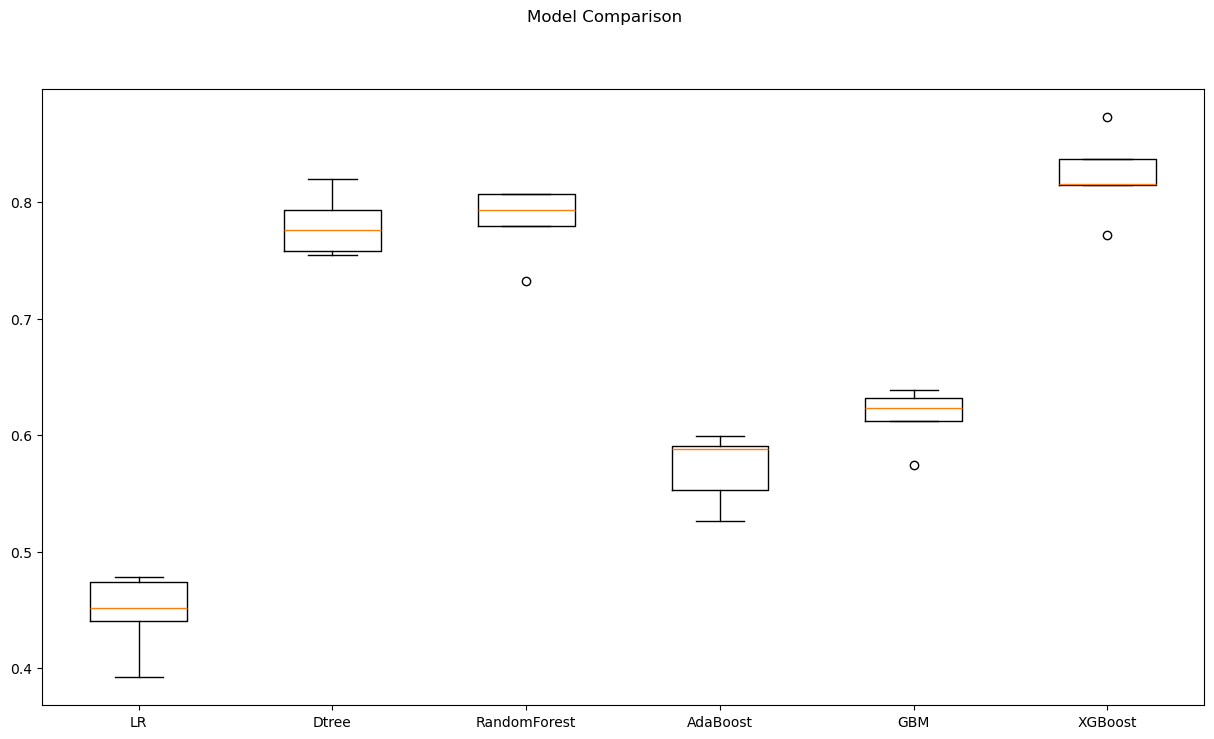

In [78]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('Cross Validation Model Comparison.png', bbox_inches='tight')
plt.show();

##### XGBoost is returning the highest mean cross-validated recall followed by RandomForst, and DecisionTree
##### XGBoost also has the highest recall score on the validation data set
##### No major outliers are present, indicating consistency among the models
##### We will further, hypertune and stack the models to enhance their performance

# Decision Tree Classifier

In [79]:
# instantiating and fitting the model on the training data
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [80]:
# evaluating the model performance
pred_dtree_train = model_performance(dtree, x_train, y_train) # predicting and scoring on the training data
pred_dtree_val = model_performance(dtree, x_val, y_val) # predicting and scoring on the validation data
model_results(pred_dtree_train, pred_dtree_val)

Accuracy  Recall  Precision   F1
Training        1.00    1.00       1.00  1.0
Validation      0.93    0.78       0.81  0.8

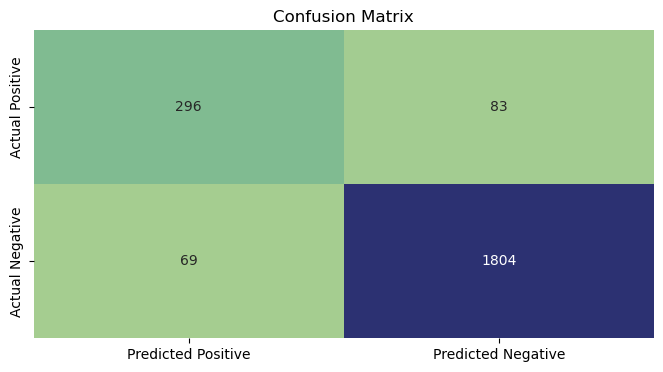

In [81]:
# generating the confusion matrix for the predicted validation data
cm(dtree, x_val, y_val)

##### Hyper Parameter Tuning 

In [82]:
# instantiating the model for hyperparameter tuning
dtree_tuned = DecisionTreeClassifier(random_state=1)

# defining the hyper parameters for tuning
param_dist = {'max_depth':np.arange(1,6,1),
              'min_samples_leaf':np.arange(1,8,1),
              'min_samples_split':np.arange(1,9,1),
              'max_leaf_nodes':np.arange(1,10,1),
              'min_impurity_decrease':[0.001,0.01,0.1]}
# scoring metric for tuning
scorer = make_scorer(recall_score) 
# instantiating RandomizedSearchCV
random_search_dt = RandomizedSearchCV(dtree_tuned, param_distributions=param_dist, cv=5,scoring=scorer, n_iter=50, random_state=1)
# fitting on the training data
random_search_dt.fit(x_train,y_train)
# extracting the best model fit
best_model_dt = random_search_dt.best_estimator_
# fitting the best model on the training data
best_model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2,
                       min_impurity_decrease=0.01, min_samples_leaf=2,
                       min_samples_split=4, random_state=1)

In [83]:
# performance on the training and validation data
pred_tuned_train_perf = model_performance(best_model_dt, x_train, y_train)
pred_tuned_val_perf = model_performance(best_model_dt, x_val, y_val)
model_results(pred_tuned_train_perf, pred_tuned_val_perf)

Accuracy  Recall  Precision   F1
Training        0.84    0.71       0.52  0.6
Validation      0.84    0.70       0.52  0.6

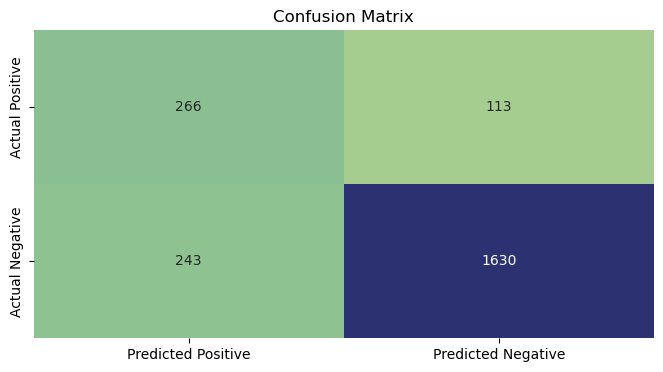

In [84]:
# confusion matrix for the tuned dtree model
cm(best_model_dt, x_val, y_val)

# Random Forest Classifier

In [85]:
# instantiating and fitting the model on the training data
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [86]:
# evaluating the model performance
pred_rf_train = model_performance(rf_model, x_train, y_train)
pred_rf_val = model_performance(rf_model, x_val, y_val)
model_results(pred_rf_train, pred_rf_val)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.96    0.79       0.98  0.87

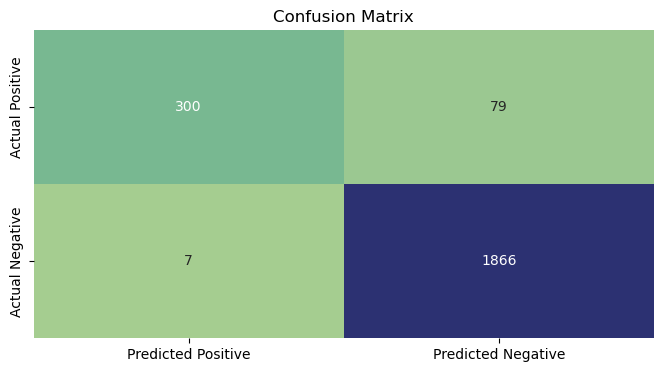

In [87]:
# plotting the confusion matrix for the rf model
cm(rf_model, x_val, y_val)

#### Hypertuning the model

In [88]:
# instantiating the model
rf_tuned = RandomForestClassifier(random_state=1)
# defining the hyperparameters for tuning
param_dist = {'n_estimators':np.arange(50,450,50),
              'max_depth':np.arange(1,9,1),
              'min_samples_leaf':np.arange(1,10,1),
              'min_samples_split':np.arange(1,10,1),
              'max_features':np.arange(0.1,0.6,0.1)}
# defining the scoring metric for tuning
scorer = make_scorer(recall_score)
# instantiating the RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_tuned, param_distributions=param_dist, cv=5, n_iter=50, scoring=scorer, random_state=1)
# fitting on the training data
random_search_rf.fit(x_train,y_train)
# returning the best model
best_model_rf = random_search_rf.best_estimator_
# fitting the best model on the training data
best_model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_split=5,
                       n_estimators=50, random_state=1)

In [89]:
# evaluating the model performance
pred_train_rf_tuned = model_performance(best_model_rf, x_train, y_train)
pred_val_rf_tuned = model_performance(best_model_rf, x_val, y_val)
model_results(pred_train_rf_tuned, pred_val_rf_tuned)

Accuracy  Recall  Precision    F1
Training        0.96    0.80       0.97  0.88
Validation      0.93    0.67       0.90  0.77

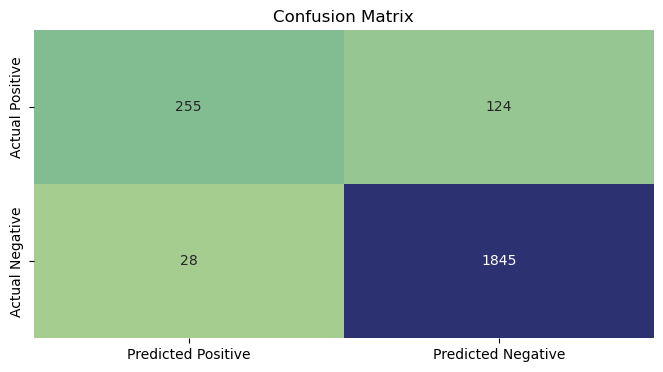

In [90]:
# plotting the confusion matrix
cm(best_model_rf, x_val, y_val)

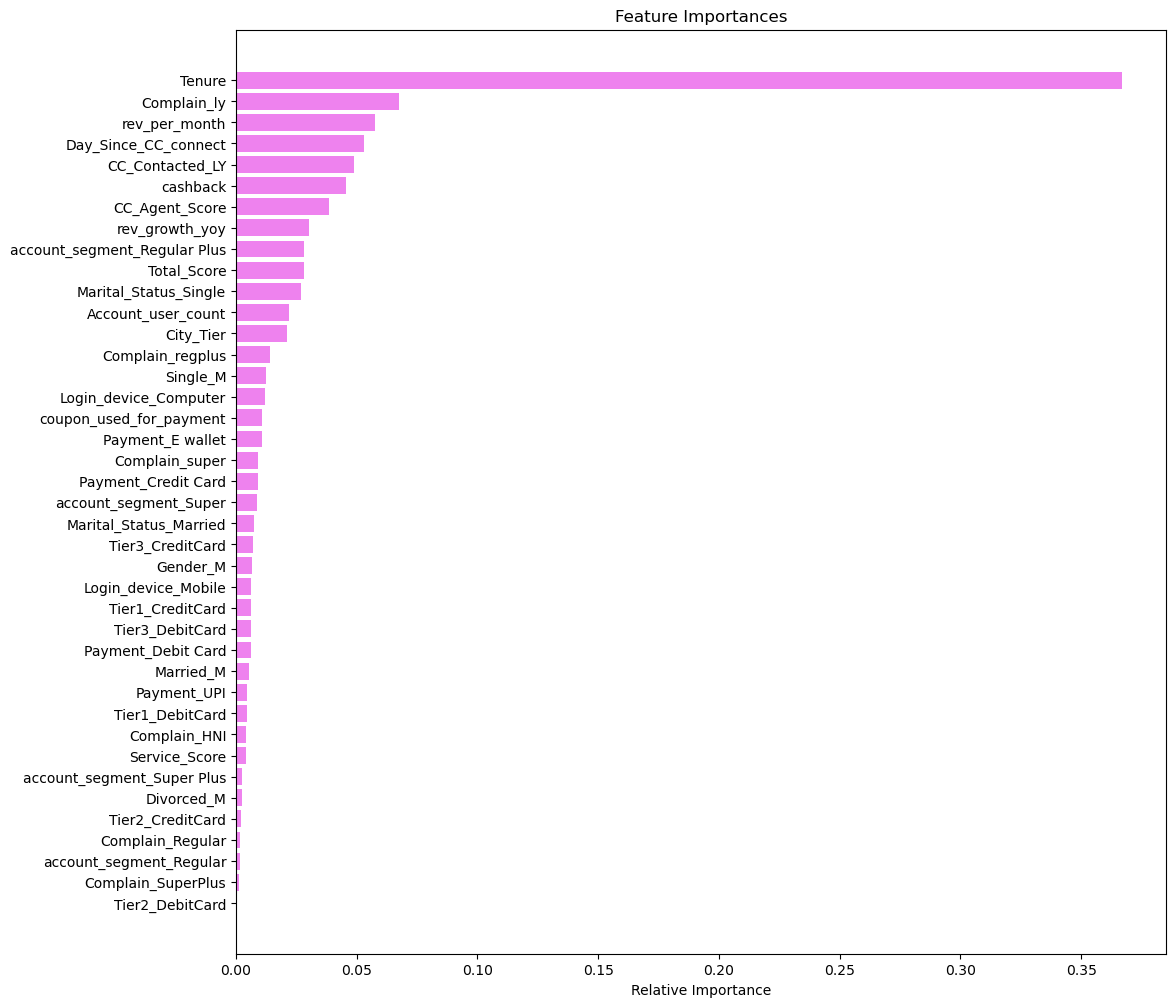

In [91]:
# feature importances for the hypertuned RandomClassifier model
feature_names = x_val.columns
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet',align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importances.png', bbox_inches='tight')
plt.show();

### Performance of the tuned RandomForest model on the balanced dataset

In [92]:
# instantiating the model
rf_tuned1 = RandomForestClassifier(random_state=1)
# defining the hyperparameters for tuning
param_dist1 = {'n_estimators':np.arange(50,450,50),
              'max_depth':np.arange(1,9,1),
              'min_samples_leaf':np.arange(1,10,1),
              'min_samples_split':np.arange(1,10,1),
              'max_features':np.arange(0.1,0.6,0.1)}
# defining the scoring metric for tuning
scorer1 = make_scorer(recall_score)
# instantiating the RandomizedSearchCV
random_search_rf1 = RandomizedSearchCV(rf_tuned1, param_distributions=param_dist1, cv=5, n_iter=50, scoring=scorer1, random_state=1)
# fitting on the training data
random_search_rf1.fit(x_train_res,y_train_res)
# returning the best model
best_model_rf1 = random_search_rf1.best_estimator_
# fitting the best model on the training data
best_model_rf1.fit(x_train_res,y_train_res)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_split=5,
                       n_estimators=50, random_state=1)

In [93]:
# performance of the model on training and validation data
pred_train_tuned_rf_bal = model_performance(best_model_rf1, x_train_res, y_train_res)
pred_val_tuned_rf_bal = model_performance(best_model_rf1, x_val, y_val)
model_results(pred_train_tuned_rf_bal, pred_val_tuned_rf_bal)

Accuracy  Recall  Precision    F1
Training        0.96    0.95       0.96  0.96
Validation      0.92    0.78       0.75  0.77

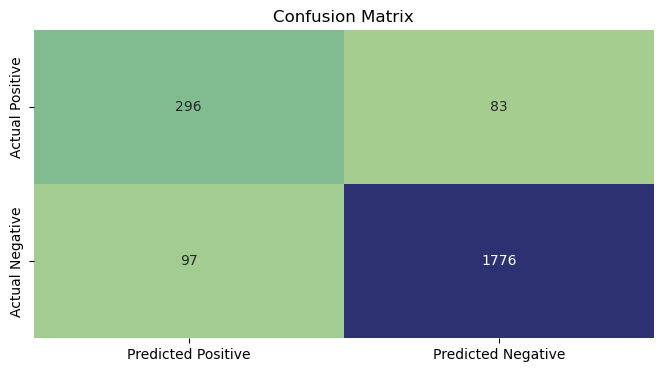

In [94]:
# plotting the confusion matrix
cm(best_model_rf1, x_val, y_val)

# XGBoost Classifier

In [95]:
# instantiating the model and fitting on the training data
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [96]:
# evaluating the performance of the model on the training and the validation data
pred_train_xgb = model_performance(xgb, x_train, y_train)
pred_val_xgb = model_performance(xgb, x_val, y_val)
model_results(pred_train_xgb, pred_val_xgb)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.96    0.82       0.93  0.87

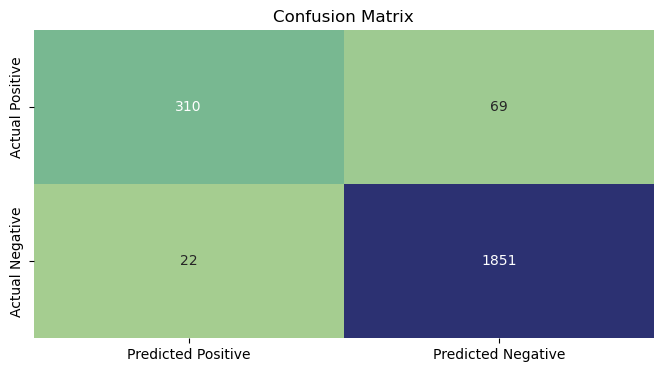

In [97]:
# plotting the confusion matrix
cm(xgb, x_val, y_val)

#### Hypertuning the model

In [98]:
# instantiating the model
xgb_tuned = XGBClassifier(random_state=1)
# defining the hyperparameters for tuning
param_dist = {'n_estimators':np.arange(50,450,50),
              'learning_rate':np.linspace(0.01,0.3,10),
              'max_depth':np.arange(1,8,1),
              'min_child_weight':np.arange(1,8,1),
              'gamma':np.linspace(0,0.5,6),
              'colsample_bytree':np.linspace(0.3,1,8),
              'reg_alpha':[0,0.1,1],
              'reg_lambda':[0.1,1,10]}
# defining the scoring metric for tuning
scorer = make_scorer(recall_score)
# instantiating the RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb_tuned, param_distributions=param_dist, cv=5, n_iter=50, scoring=scorer, random_state=1)
# fitting on the training data
random_search_xgb.fit(x_train,y_train)
# returning the best model
best_model_xgb = random_search_xgb.best_estimator_
# fitting the best model on the training data
best_model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.20333333333333334, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [99]:
# evaluating the performance of the model
pred_train_xgb_tuned = model_performance(best_model_xgb, x_train, y_train)
pred_val_xgb_tuned = model_performance(best_model_xgb, x_val, y_val)
model_results(pred_train_xgb_tuned, pred_val_xgb_tuned)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.96    0.82       0.96  0.89

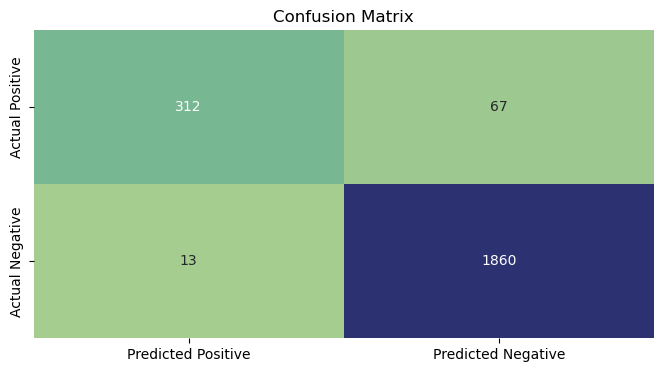

In [100]:
# plotting the confusion matrix for the model
cm(best_model_xgb, x_val, y_val)

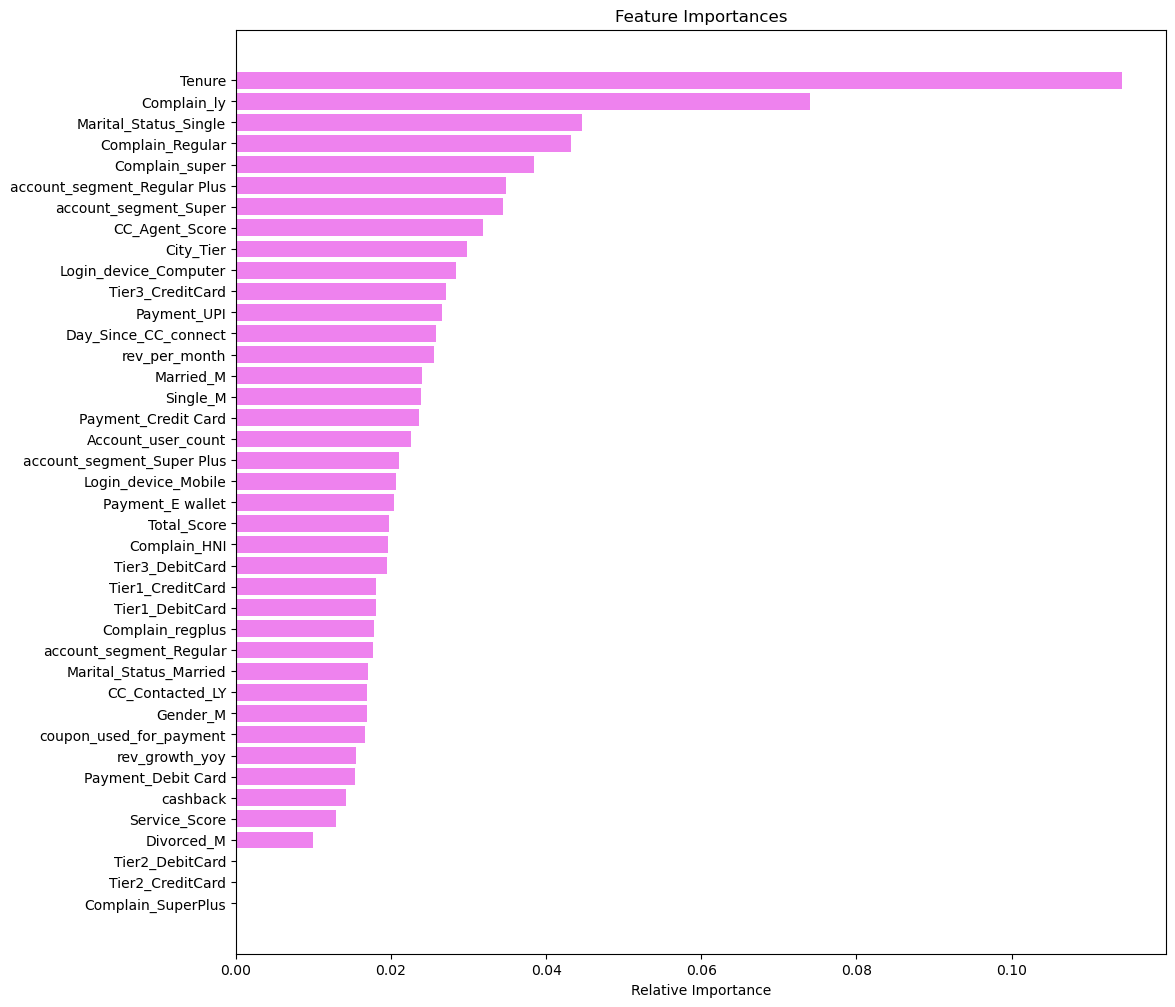

In [101]:
# feature importances for the hypertuned XGBClassifier model
feature_names = x_val.columns
importances = best_model_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet',align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importances.png', bbox_inches='tight')
plt.show();

### Performance of the hypertuned XGB model on the balanced dataset

In [102]:
# instantiating the model
xgb_tuned1 = XGBClassifier(random_state=1)
# defining the hyperparameters for tuning
param_dist1 = {'n_estimators':np.arange(50,450,50),
              'learning_rate':np.linspace(0.01,0.3,10),
              'max_depth':np.arange(1,8,1),
              'min_child_weight':np.arange(1,8,1),
              'gamma':np.linspace(0,0.5,6),
              'colsample_bytree':np.linspace(0.3,1,8),
              'reg_alpha':[0,0.1,1],
              'reg_lambda':[0.1,1,10]}
# defining the scoring metric for tuning
scorer1 = make_scorer(recall_score)
# instantiating the RandomizedSearchCV
random_search_xgb1 = RandomizedSearchCV(xgb_tuned1, param_distributions=param_dist1, cv=5, n_iter=50, scoring=scorer1, random_state=1)
# fitting on the training data
random_search_xgb1.fit(x_train_res,y_train_res)
# returning the best model
best_model_xgb1 = random_search_xgb1.best_estimator_
# fitting the best model on the training data
best_model_xgb1.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.20333333333333334, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [103]:
# evaluating the performance of the model
pred_train_xgb_bal = model_performance(best_model_xgb1, x_train, y_train)
pred_val_xgb_bal = model_performance(best_model_xgb1, x_val, y_val)
model_results(pred_train_xgb_bal, pred_val_xgb_bal)

Accuracy  Recall  Precision    F1
Training        1.00    1.00        1.0  1.00
Validation      0.96    0.83        0.9  0.87

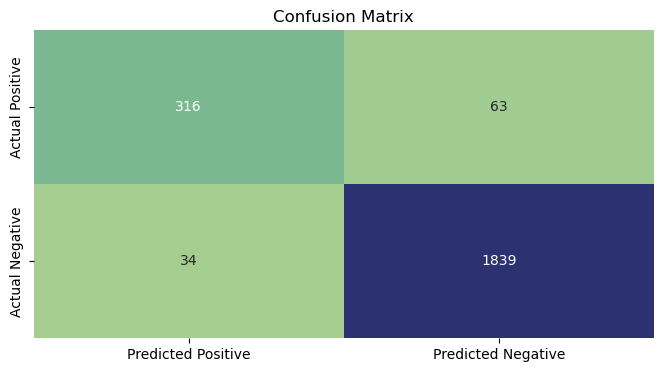

In [104]:
# plotting the confusion matrix for the model
cm(best_model_xgb1, x_val, y_val)

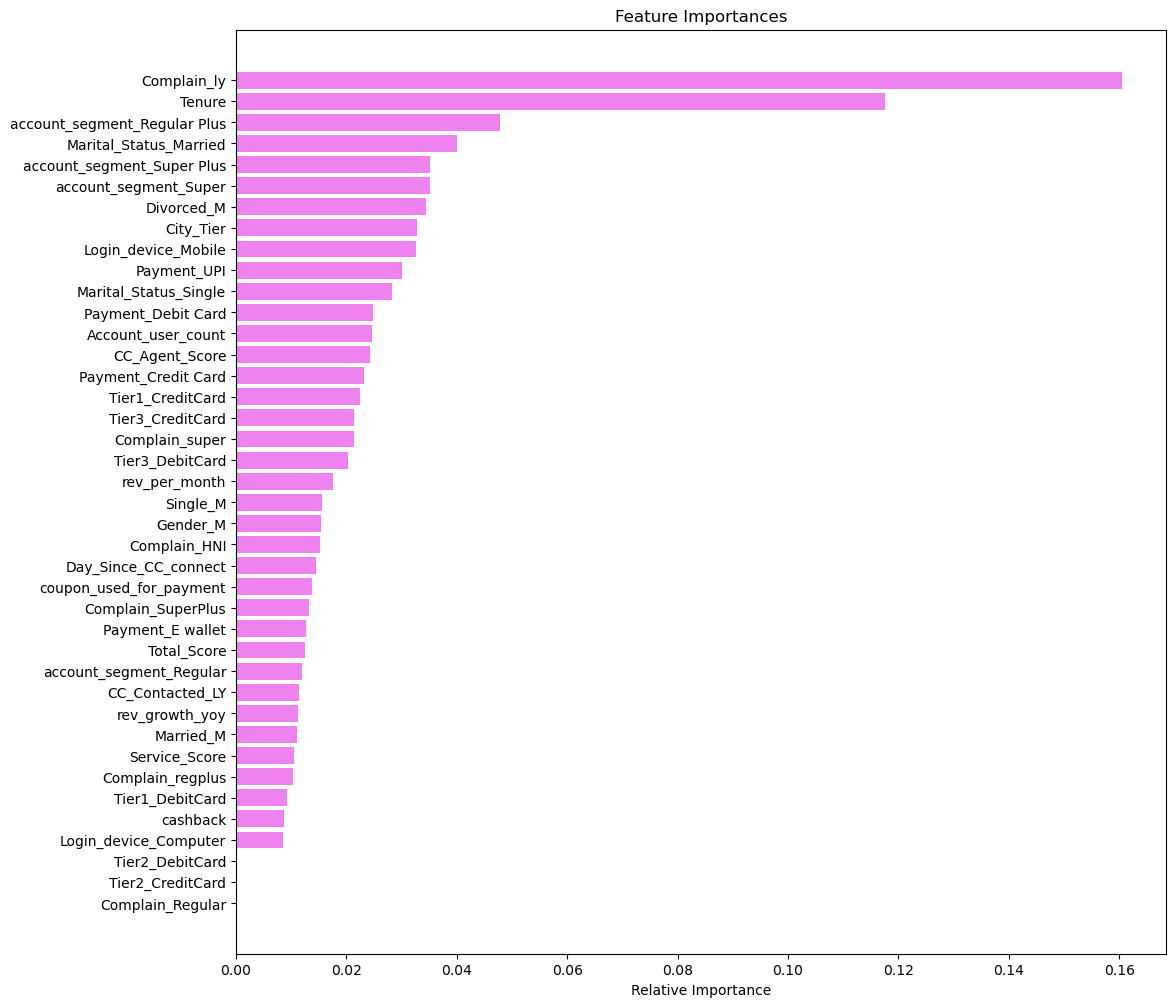

In [105]:
# feature importances for the hypertuned XGBClassifier model on balanced data
feature_names = x_val.columns
importances = best_model_xgb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet',align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importances.png', bbox_inches='tight')
plt.show();

## Comparison of Train and Validation Performance

In [106]:
# Comparing the training performances of all the models
# creating a dataframe of the training scores

models_train_comp = pd.concat([pred_dtree_train.T,
                               pred_tuned_train_perf.T,
                               pred_rf_train.T,
                               pred_train_rf_tuned.T,
                               pred_train_tuned_rf_bal.T,
                               pred_train_xgb.T,
                               pred_train_xgb_tuned.T,
                               pred_train_xgb_bal.T], axis=1)
models_train_comp.columns = ['Decision Tree',
                             'Hypertuned Decision Tree',
                             'Random Forest',
                             'Hypertuned Random Forest',
                             'Hypertuned Random Forest on balanced data',
                             'XGBoost',
                             'Hypertuned XGBoost',
                             'Hypertuned XGBoost on balanced data']

In [107]:
# comparison of the validation performances of all the models
# creating a datafram of the validation scores

models_val_comp = pd.concat([pred_dtree_val.T,
                             pred_tuned_val_perf.T,
                             pred_rf_val.T,
                             pred_val_rf_tuned.T,
                             pred_val_tuned_rf_bal.T,
                             pred_val_xgb.T,
                             pred_val_xgb_tuned.T,
                             pred_val_xgb_bal.T], axis=1)
models_val_comp.columns = ['Decision Tree',
                           'Hypertuned Decision Tree',
                           'Random Forest',
                           'Hypertuned Random Forest',
                           'Hypertuned Random Forest on balanced data',
                           'XGBoost',
                           'Hypertuned XGBoost',
                           'Hypertuned XGBoost on balanced data']

In [108]:
print('Training Model Performances :')
models_train_comp

Training Model Performances :


Decision Tree  Hypertuned Decision Tree  Random Forest  \
Accuracy             1.0                      0.84            1.0   
Recall               1.0                      0.71            1.0   
Precision            1.0                      0.52            1.0   
F1                   1.0                      0.60            1.0   

           Hypertuned Random Forest  \
Accuracy                       0.96   
Recall                         0.80   
Precision                      0.97   
F1                             0.88   

           Hypertuned Random Forest on balanced data  XGBoost  \
Accuracy                                        0.96      1.0   
Recall                                          0.95      1.0   
Precision                                       0.96      1.0   
F1                                              0.96      1.0   

           Hypertuned XGBoost  Hypertuned XGBoost on balanced data  
Accuracy                  1.0                                  1.0  
Recall                    1.0                                  1.0  
Precision                 1.0                                  1.0  
F1                        1.0                                  1.0

In [109]:
print('Validation Model Performances :')
models_val_comp

Validation Model Performances :


Decision Tree  Hypertuned Decision Tree  Random Forest  \
Accuracy            0.93                      0.84           0.96   
Recall              0.78                      0.70           0.79   
Precision           0.81                      0.52           0.98   
F1                  0.80                      0.60           0.87   

           Hypertuned Random Forest  \
Accuracy                       0.93   
Recall                         0.67   
Precision                      0.90   
F1                             0.77   

           Hypertuned Random Forest on balanced data  XGBoost  \
Accuracy                                        0.92     0.96   
Recall                                          0.78     0.82   
Precision                                       0.75     0.93   
F1                                              0.77     0.87   

           Hypertuned XGBoost  Hypertuned XGBoost on balanced data  
Accuracy                 0.96                                 0.96  
Recall                   0.82                                 0.83  
Precision                0.96                                 0.90  
F1                       0.89                                 0.87

### We can see that the Hypertuned XGBoost and the Random Forest are the best performing models on validation data

# Stacking Classifier

### We will try to build stacking classifier models with multiple different combinations and the Hypertuned XGB as the final estimator

### Stacking Classifier Combination #1

In [110]:
# stacking classifier combination #1
estimator1 = [('Decision Tree',dtree), ('Random Forest',rf_model)]
final_estimator1 = best_model_xgb
stacking_classifier1 = StackingClassifier(estimators=estimator1, final_estimator=final_estimator1)
stacking_classifier1.fit(x_train,y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=1.0,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 ev...
                                                 gamma=0.0, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.20333333333333334,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=4,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [111]:
# evaluating the performance of the model on the training and validation data
stacking1_train = model_performance(stacking_classifier1, x_train, y_train)
stacking1_val = model_performance(stacking_classifier1, x_val, y_val)
model_results(stacking1_train, stacking1_val)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.97    0.88       0.95  0.91

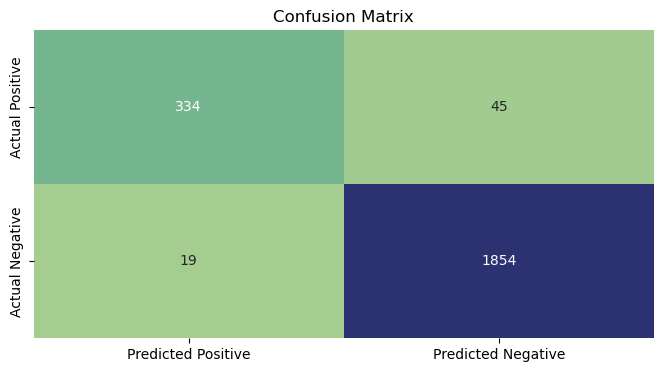

In [112]:
# plotting the confusion matrix for the model
cm(stacking_classifier1, x_val, y_val)

#### Checking the performance of the stacking classifier by training on the balanced data

In [113]:
# stacking classifier combination #1 on balanced data
estimator1_bal = [('Decision Tree',dtree), ('Random Forest',rf_model)]
final_estimator1_bal = best_model_xgb
stacking_classifier1_bal = StackingClassifier(estimators=estimator1_bal, final_estimator=final_estimator1_bal)
stacking_classifier1_bal.fit(x_train_res,y_train_res)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=1.0,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 ev...
                                                 gamma=0.0, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.20333333333333334,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=4,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [114]:
# evaluating the model performance on the training and the validation data
stacking1_train_bal = model_performance(stacking_classifier1_bal, x_train_res, y_train_res)
stacking1_val_bal = model_performance(stacking_classifier1_bal, x_val, y_val)
model_results(stacking1_train_bal, stacking1_val_bal)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.96    0.86       0.92  0.89

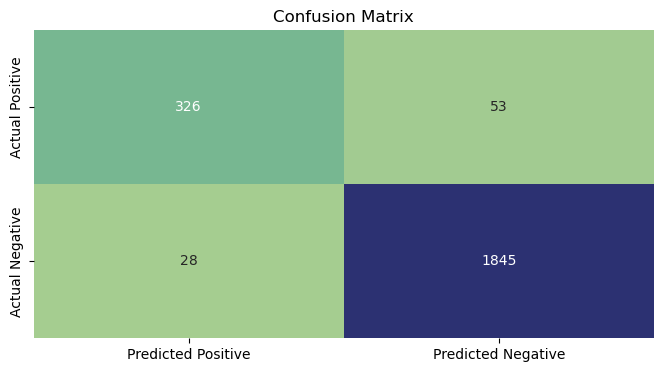

In [115]:
# plotting the confusion matrix for the model
cm(stacking_classifier1_bal, x_val, y_val)

### Stacking Classifier Combination #2

In [116]:
estimator2 = [('Hypertuned Random Forest on balanced data',best_model_rf1), ('XGBoost',xgb)]
final_estimator2 = best_model_xgb
stacking_classifier2 = StackingClassifier(estimators=estimator2, final_estimator=final_estimator2)
stacking_classifier2.fit(x_train,y_train)

StackingClassifier(estimators=[('Hypertuned Random Forest on balanced data',
                                RandomForestClassifier(max_depth=8,
                                                       max_features=0.5,
                                                       min_samples_split=5,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None...
                                                 gamma=0.0, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.20333333333333334,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=4,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [117]:
# evaluating the performance of the model on the training and the validation data
stacking2_train = model_performance(stacking_classifier2, x_train, y_train)
stacking2_val = model_performance(stacking_classifier2, x_val, y_val)
model_results(stacking2_train, stacking2_val)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.96    0.85       0.91  0.88

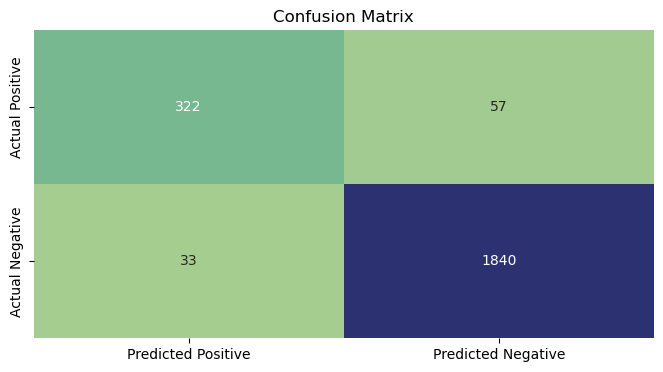

In [118]:
# plotting the confusion matrix for the validation data
cm(stacking_classifier2, x_val, y_val)

### Stacking Classifier Combination #3

In [119]:
estimator3 = [('Hypertuned Decision Tree',best_model_dt), ('Hypertuned Random Forest',best_model_rf)]
final_estimator3 = best_model_xgb
stacking_classifier3 = StackingClassifier(estimators=estimator3, final_estimator=final_estimator3)
stacking_classifier3.fit(x_train,y_train)

StackingClassifier(estimators=[('Hypertuned Decision Tree',
                                DecisionTreeClassifier(max_depth=1,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.01,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       random_state=1)),
                               ('Hypertuned Random Forest',
                                RandomForestClassifier(max_depth=8,
                                                       max_features=0.5,
                                                       min_samples_split=5,
                                                       n_estimators=50,
                                                       random_state=1))],
                   final_estimator=XGBClassif...
                                                 gamma=0.0, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.20333333333333334,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=4,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [120]:
# evaluating the performance of the model on the training and the validation data
stacking3_train = model_performance(stacking_classifier3, x_train, y_train)
stacking3_val = model_performance(stacking_classifier3, x_val, y_val)
model_results(stacking3_train, stacking3_val)

Accuracy  Recall  Precision    F1
Training        0.97    0.83       0.98  0.90
Validation      0.94    0.70       0.89  0.78

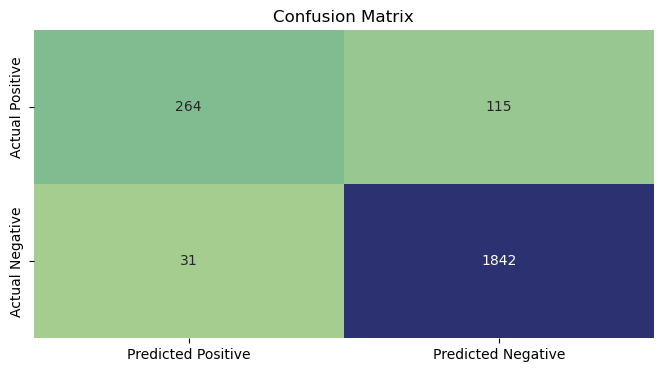

In [121]:
# plotting the confusion matrix for the model
cm(stacking_classifier3, x_val, y_val)

# Comparing the validation scores of the stacking classifier models

In [122]:
# defining a dataframe to store the performances of all the training scores

stack_models_train = pd.concat([stacking1_train.T,
                                stacking2_train.T,
                                stacking3_train.T], axis=1)
stack_models_train.columns = ['Stacking Classifier 1',
                              'Stacking Classifier 2',
                              'Stacking Classifier 3']

In [123]:
# defining a dataframe to store the performances of all the validtion scores

stack_models_val = pd.concat([stacking1_val.T,
                              stacking2_val.T,
                              stacking3_val.T], axis=1)
stack_models_val.columns = ['Stacking Classifier 1',
                            'Stacking Classifier 2',
                            'Stacking Classifier 3']

In [124]:
print('Stacking Models Training Performance Comparison :')
stack_models_train

Stacking Models Training Performance Comparison :


Stacking Classifier 1  Stacking Classifier 2  Stacking Classifier 3
Accuracy                     1.0                    1.0                   0.97
Recall                       1.0                    1.0                   0.83
Precision                    1.0                    1.0                   0.98
F1                           1.0                    1.0                   0.90

In [125]:
print('Stacking Models Validation Performance Comparison :')
stack_models_val

Stacking Models Validation Performance Comparison :


Stacking Classifier 1  Stacking Classifier 2  Stacking Classifier 3
Accuracy                    0.97                   0.96                   0.94
Recall                      0.88                   0.85                   0.70
Precision                   0.95                   0.91                   0.89
F1                          0.91                   0.88                   0.78

### Out of all the individuals models and the stacking models, Stacking Classifier Combination #1 has the best overall scores accross all metrics

# Best Model - Performance on Testing Data

In [126]:
# Stacking Classifier #1 performance on the training and validation data
stacking1_train = model_performance(stacking_classifier1, x_train, y_train)
stacking1_val = model_performance(stacking_classifier1, x_val, y_val)
model_results(stacking1_train, stacking1_val)

Accuracy  Recall  Precision    F1
Training        1.00    1.00       1.00  1.00
Validation      0.97    0.88       0.95  0.91

In [127]:
# model results on the testing data
stacking1_test = model_performance(stacking_classifier1, x_test, y_test)
print('Stacking Classifier Combination #1 : Testing Data Performance')
print(stacking1_test)

Stacking Classifier Combination #1 : Testing Data Performance
   Accuracy  Recall  Precision    F1
0      0.98    0.92       0.95  0.94


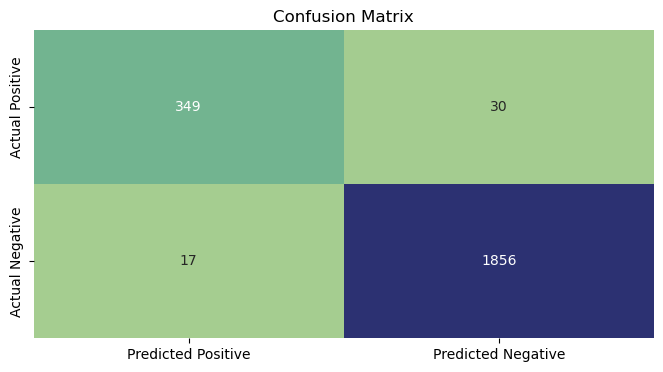

In [128]:
# plotting the confusion matrix for the model on testing data
cm(stacking_classifier1, x_test ,y_test)

## The performance of the model on the unseen (testing) data is better than the validation data, indicating that the model has generalized well and can be moved forward into production